# Diamond Price Prediction

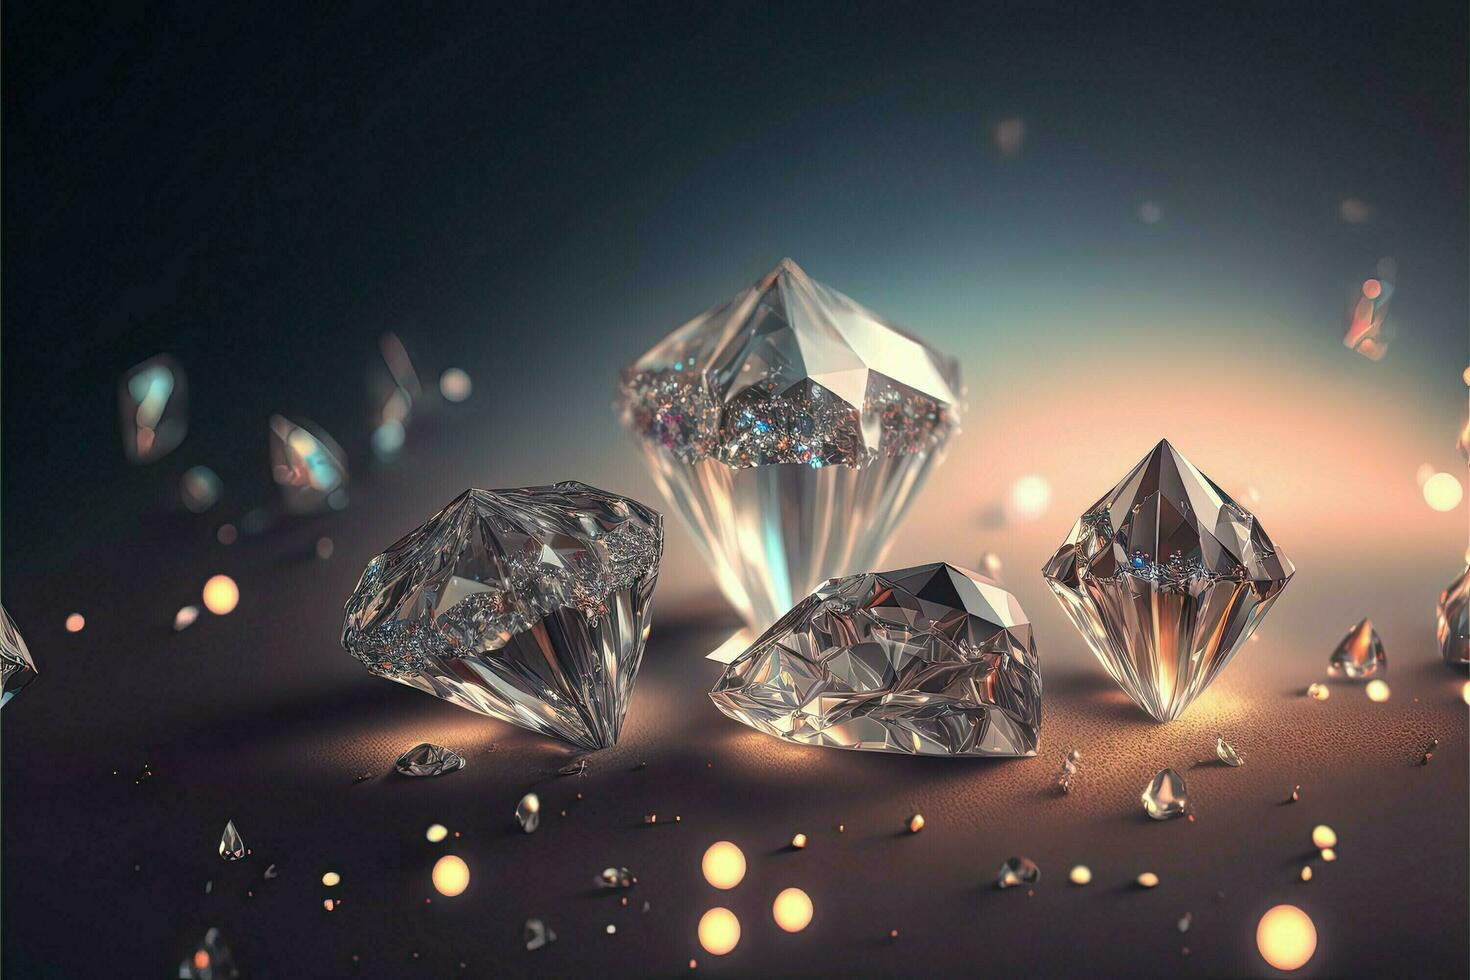

## About the Data

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

* carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

* cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

* color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

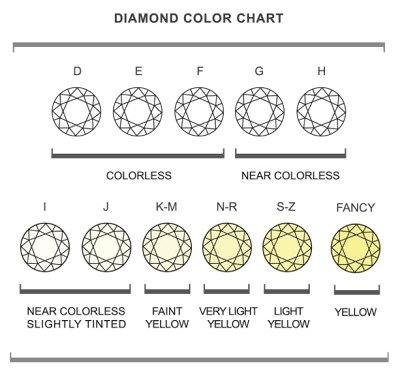

* clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

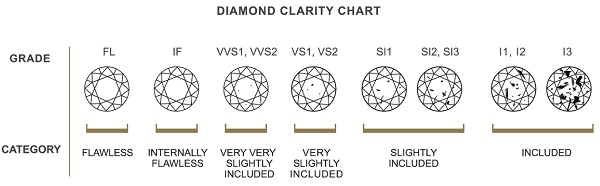

* depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

* table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.

* price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.

* x (0 - 10.74): Length of the diamond (in mm)

* y (0 - 58.9): Width of the diamond (in mm)

* z (0 - 31.8): Depth of the diamond (in mm)

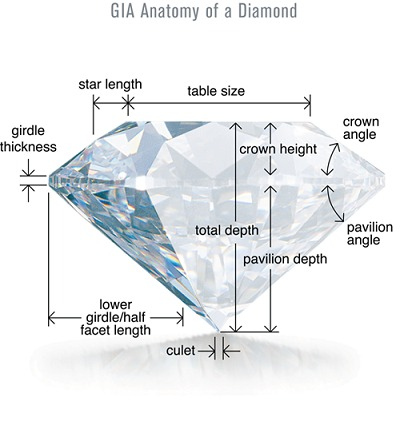

## Read Data

In [81]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score, RandomizedSearchCV
from plotly.subplots import make_subplots
pio.renderers.default = "png"

In [82]:
data = pd.read_csv('data/diamonds.csv')
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [84]:
data = data.drop("Unnamed: 0", axis=1)

In [85]:
print(data.isnull().sum())

print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Number of duplicate rows: 146


In [86]:
data = data.drop_duplicates()
print(f"\nNumber of duplicate rows after removing: {data.duplicated().sum()}")


Number of duplicate rows after removing: 0


## Exploratory Data Analysis

### What is the distribution of diamond prices?

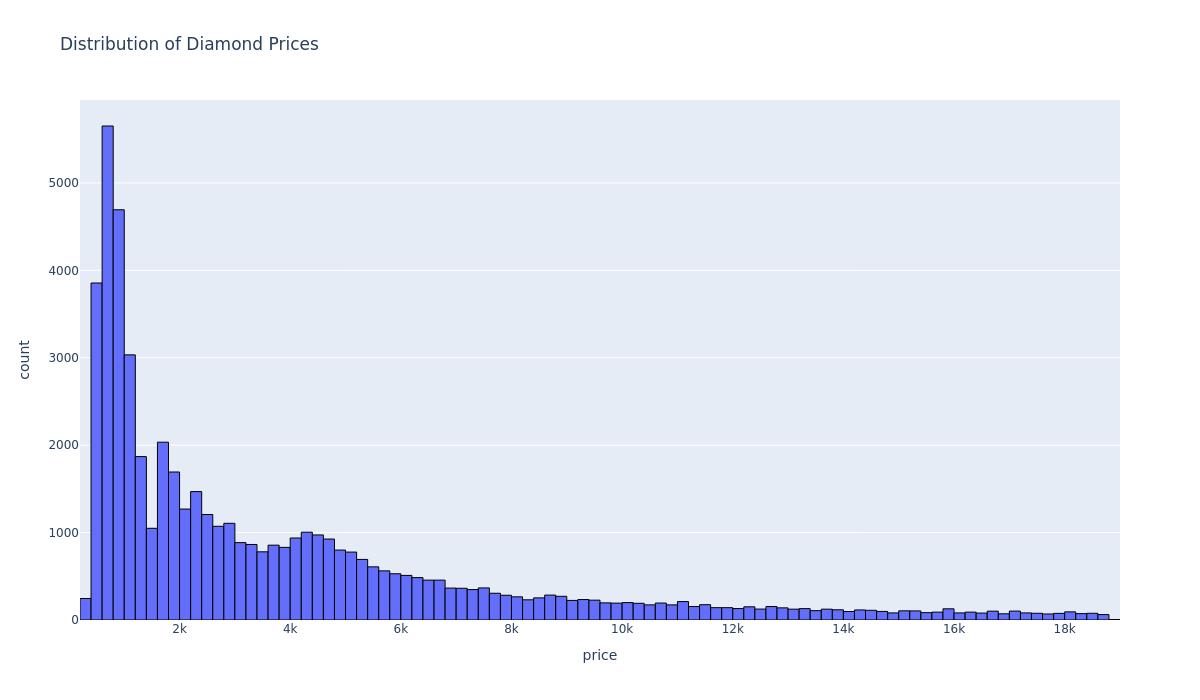

In [87]:
fig = px.histogram(
    data,
    x='price',
    width=1200,
    height=700,
    title='Distribution of Diamond Prices'
)
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.show()

The price distribution is right-skewed, indicating most diamonds are priced below $5,000, while only a few exceed this price.

### What are the distributions of carat, cut, color, and clarity?

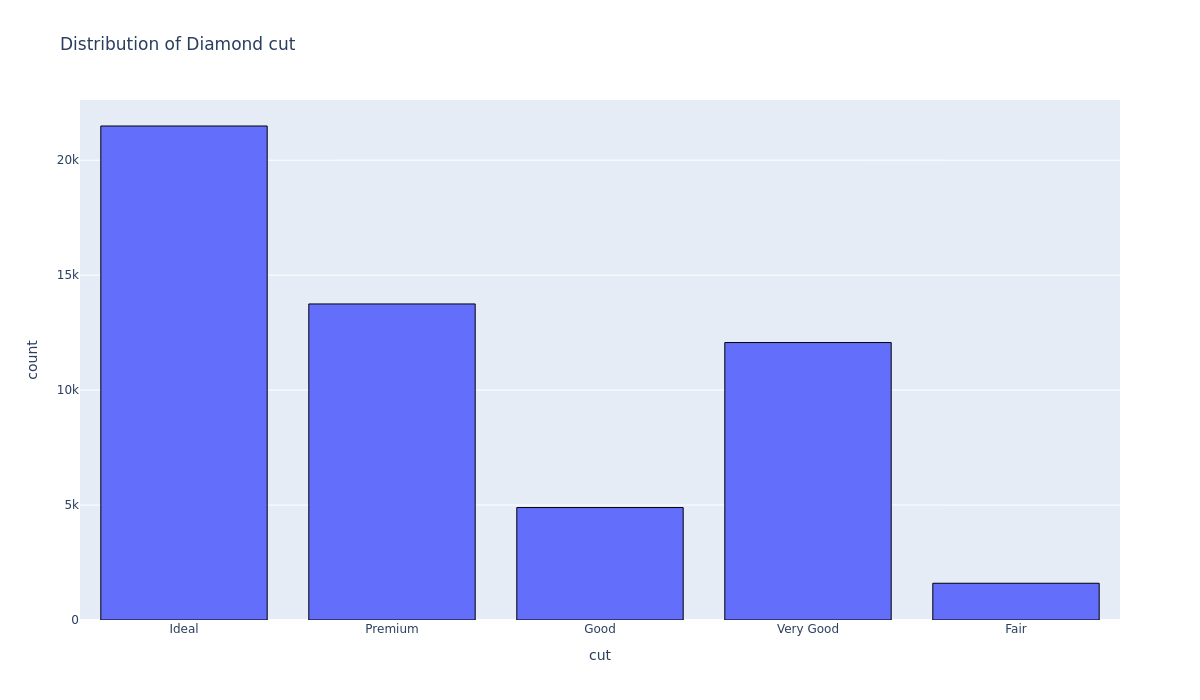

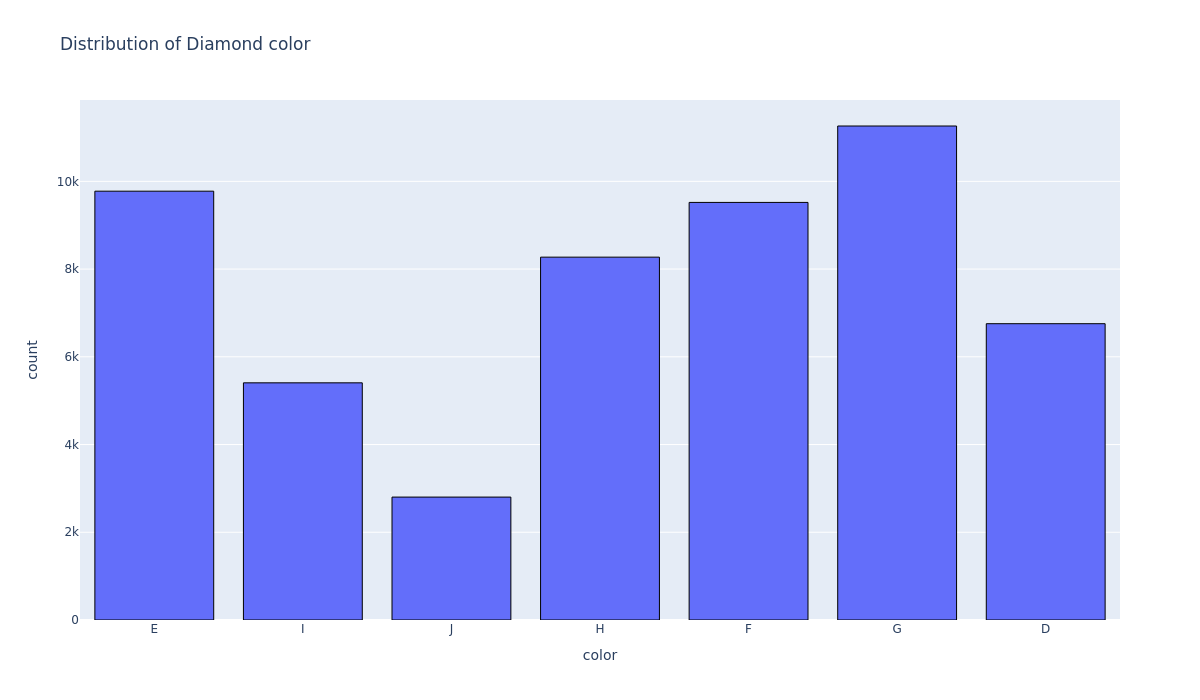

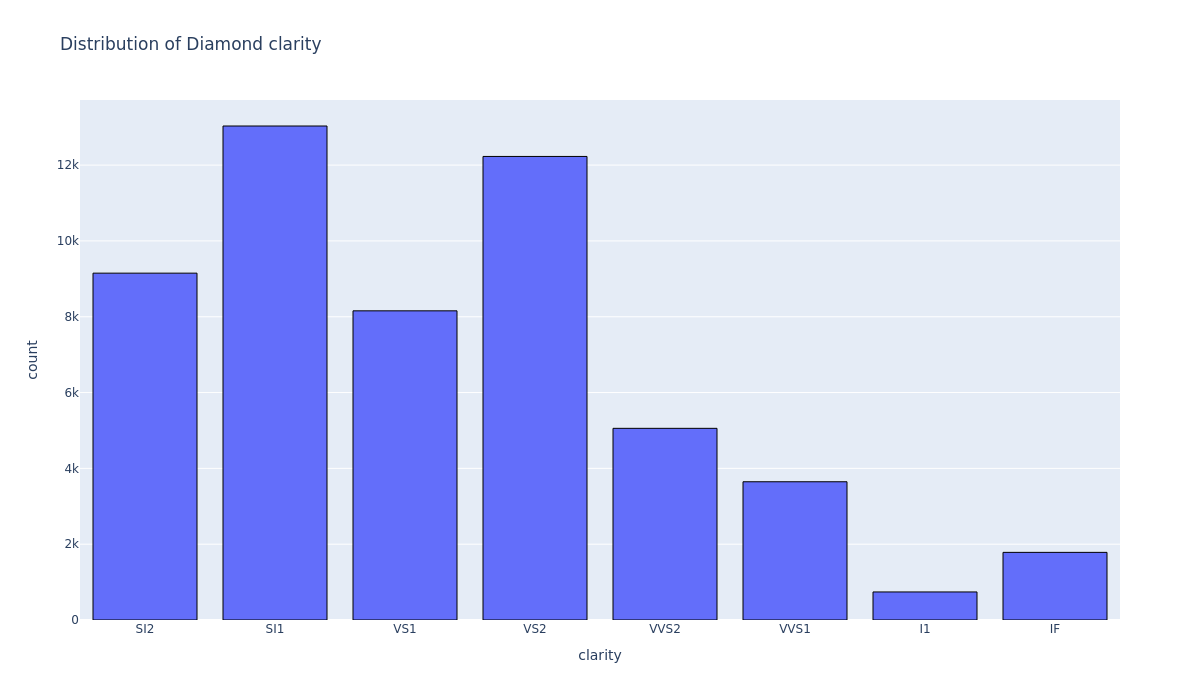

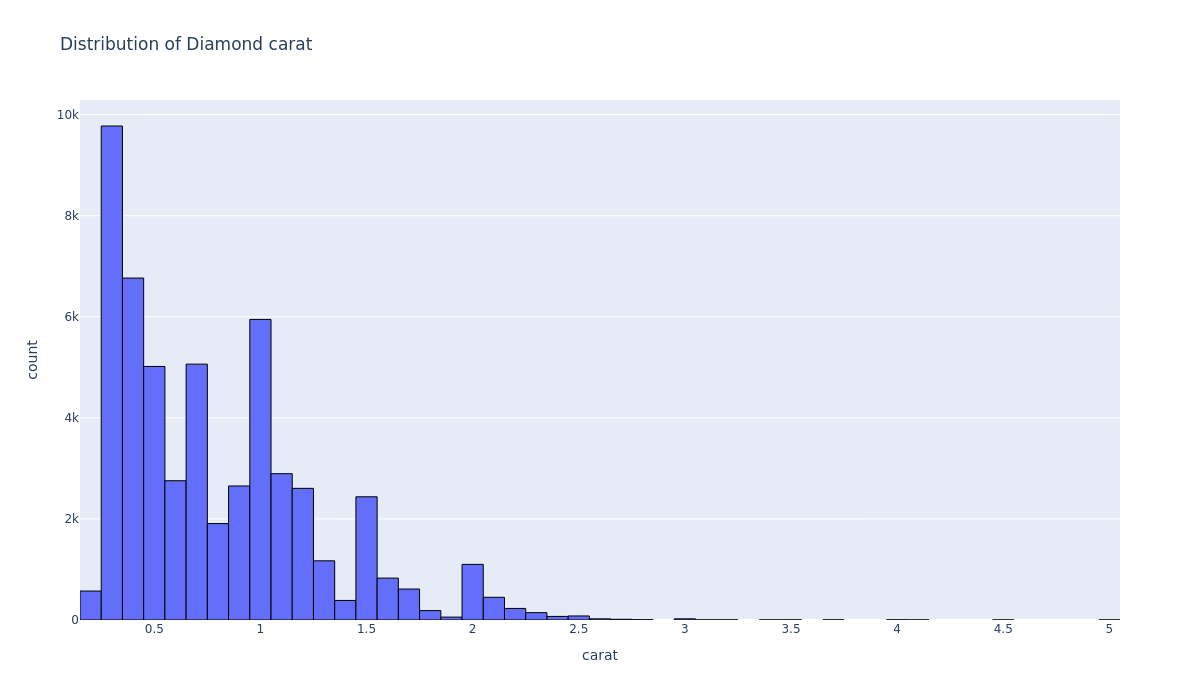

In [88]:
fig_1 = px.histogram(
    data,
    x='cut',
    width=1200,
    height=700,
    title='Distribution of Diamond cut'
)
fig_1.update_traces(marker_line_width=1, marker_line_color="black")

fig_2 = px.histogram(
    data,
    x='color',
    width=1200,
    height=700,
    title='Distribution of Diamond color'
)
fig_2.update_traces(marker_line_width=1, marker_line_color="black")

fig_3 = px.histogram(
    data,
    x='clarity',
    width=1200,
    height=700,
    title='Distribution of Diamond clarity'
)
fig_3.update_traces(marker_line_width=1, marker_line_color="black")

fig_4 = px.histogram(
    data,
    nbins=50,
    x='carat',
    width=1200,
    height=700,
    title='Distribution of Diamond carat',
)

fig_4.update_traces(marker_line_width=1, marker_line_color="black")


fig_1.show()
fig_2.show()
fig_3.show()
fig_4.show()

Insight:

* Cut: Most diamonds are in the Ideal and Premium cut categories.
* Color: A higher frequency of diamonds is observed in the middle range, particularly G, H, and I colors.
* Clarity: Diamonds are predominantly in the SI1 and VS2 clarity categories.

How does carat affect diamond prices?

In [89]:
data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]

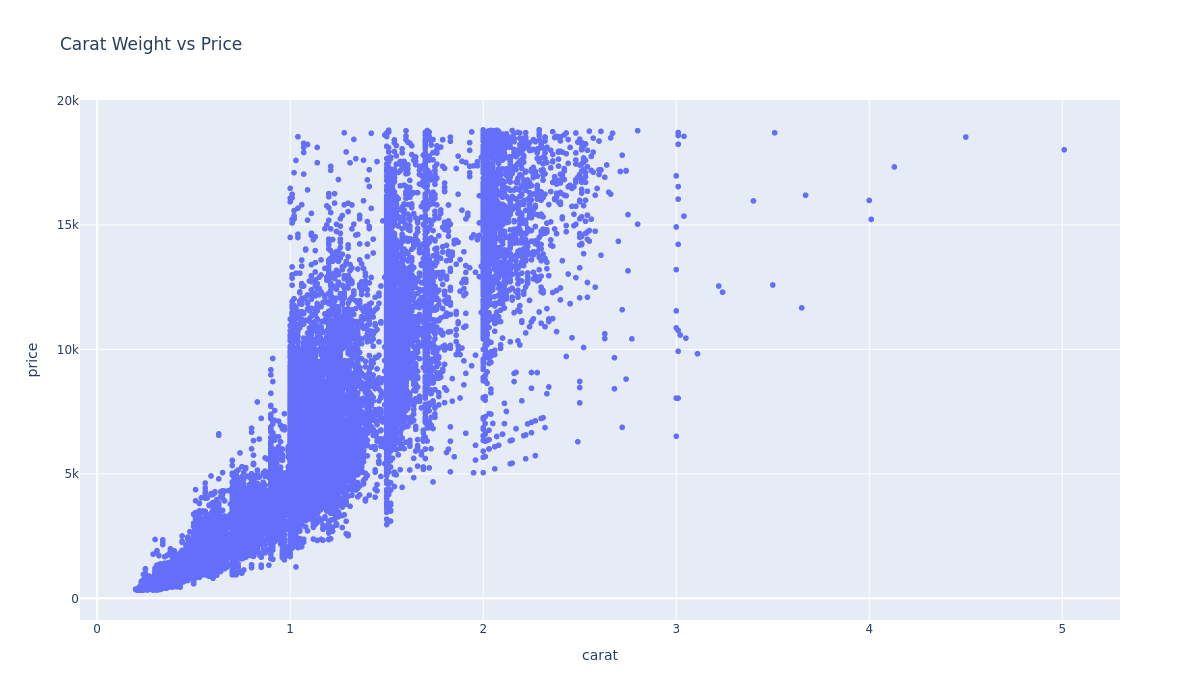

In [90]:
fig = px.scatter(
    data,
    x='carat',
    y='price',
    width=1200,
    height=700,
    title='Carat Weight vs Price'
)
fig.show()

A strong positive correlation exists between carat and price, indicating larger diamonds tend to be more expensive. However, the relationship is non-linear, as larger carat sizes significantly inflate prices.

### How do cut, color, and clarity influence diamond prices?

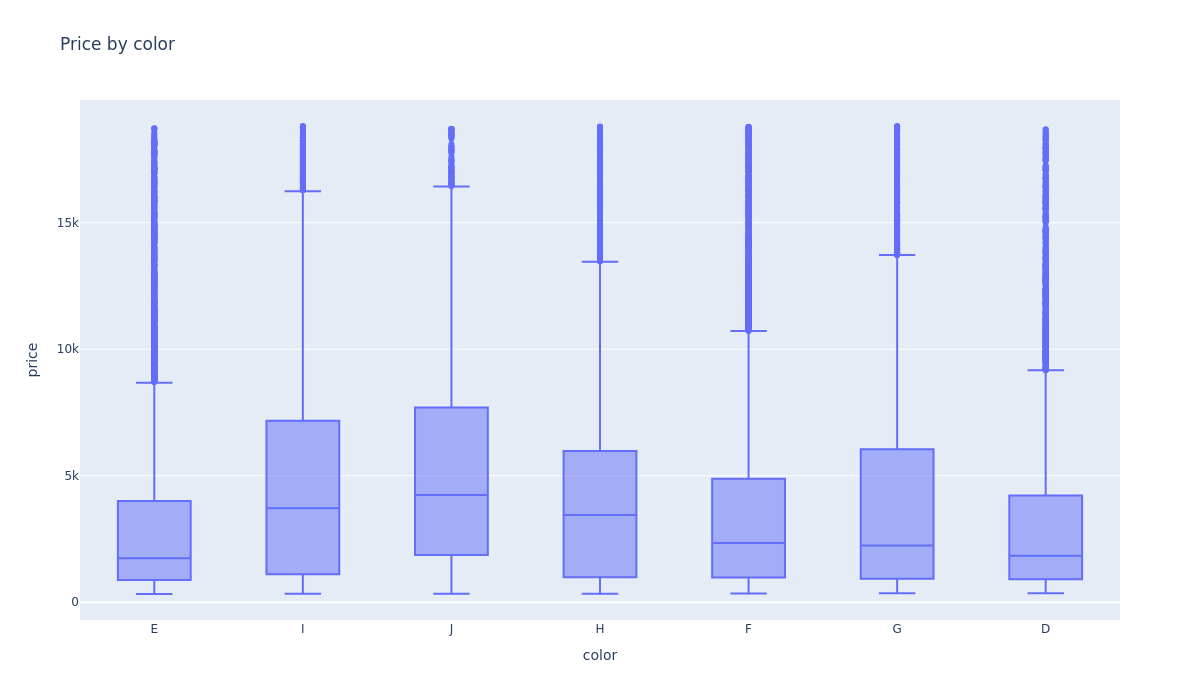

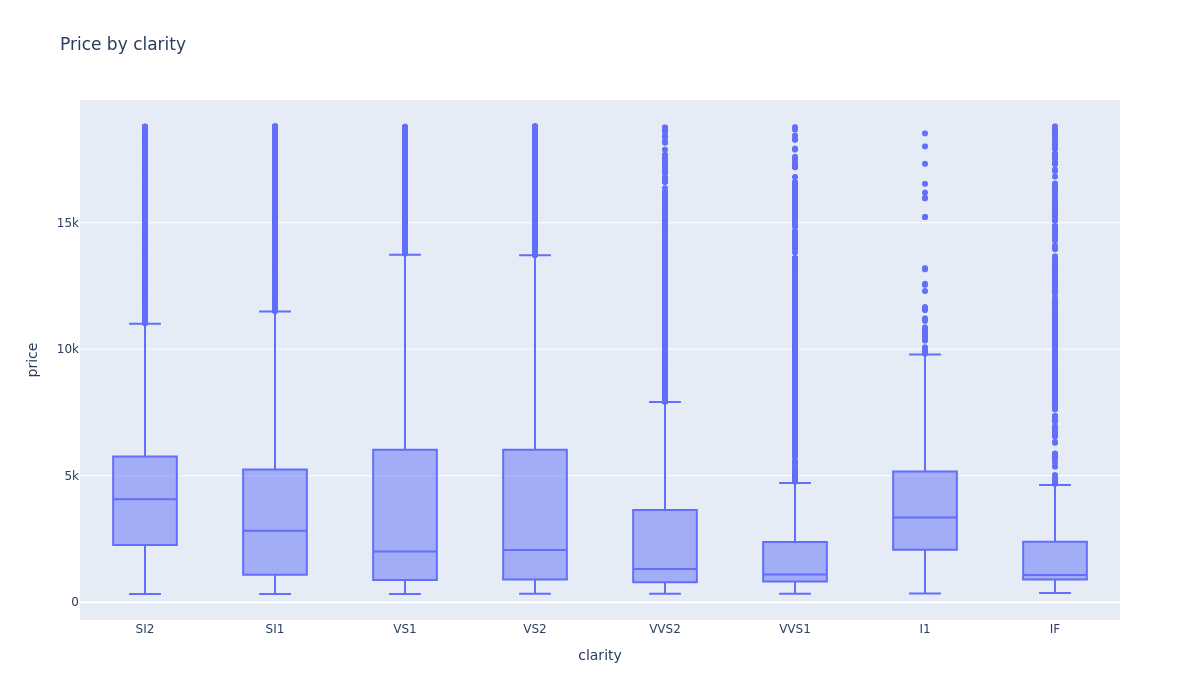

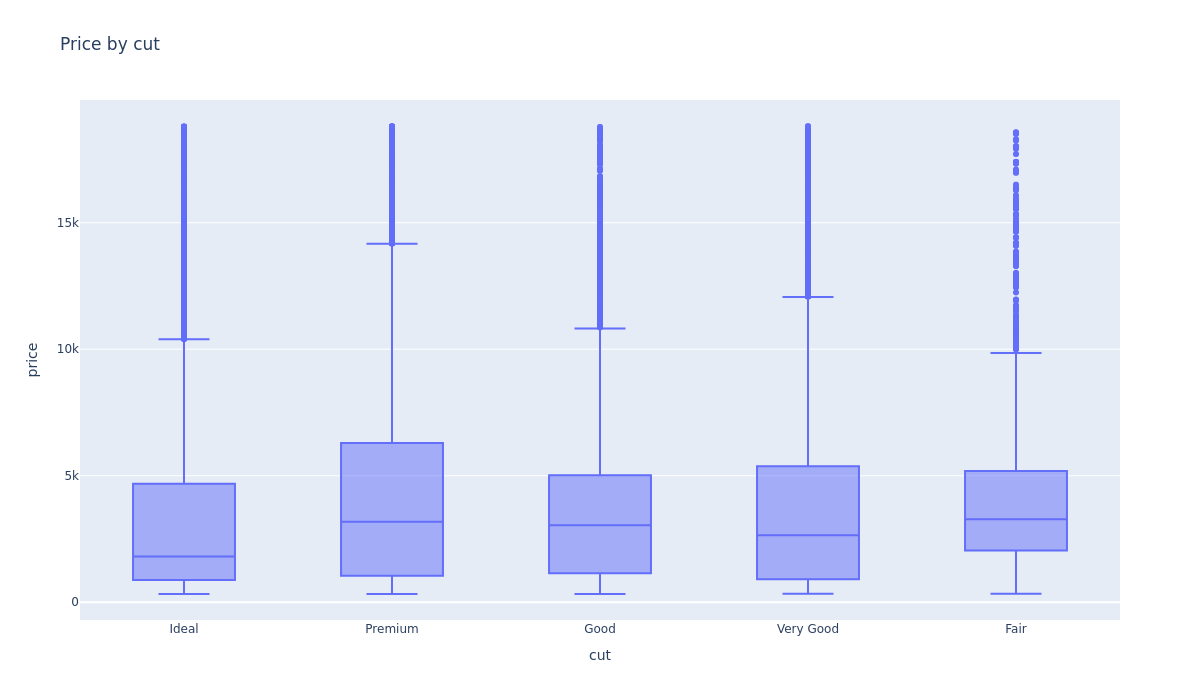

In [91]:
fig = px.box(
    data,
    x='color',
    y='price',
    width=1200,
    height=700,
    title='Price by color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity'
)
fig_2 = px.box(
    data,
    x='cut',
    y='price',
    width=1200,
    height=700,
    title='Price by cut'
)
fig.show()
fig_1.show()
fig_2.show()

Price by Cut:
* The Premium cut generally commands the highest average prices, while the Fair cut has the lowest.

Price by Color:
* Surprisingly, diamonds with lower color grades (such as J) command higher prices than those with better grades (like D). This may be due to larger sizes available in those categories.

Price by Clarity:
* Diamonds with better clarity (IF, VVS1) command higher prices, but the price gap narrows for mid-range clarity diamonds (SI1, VS2).

### Do carat, cut, color, and clarity interact to influence prices?

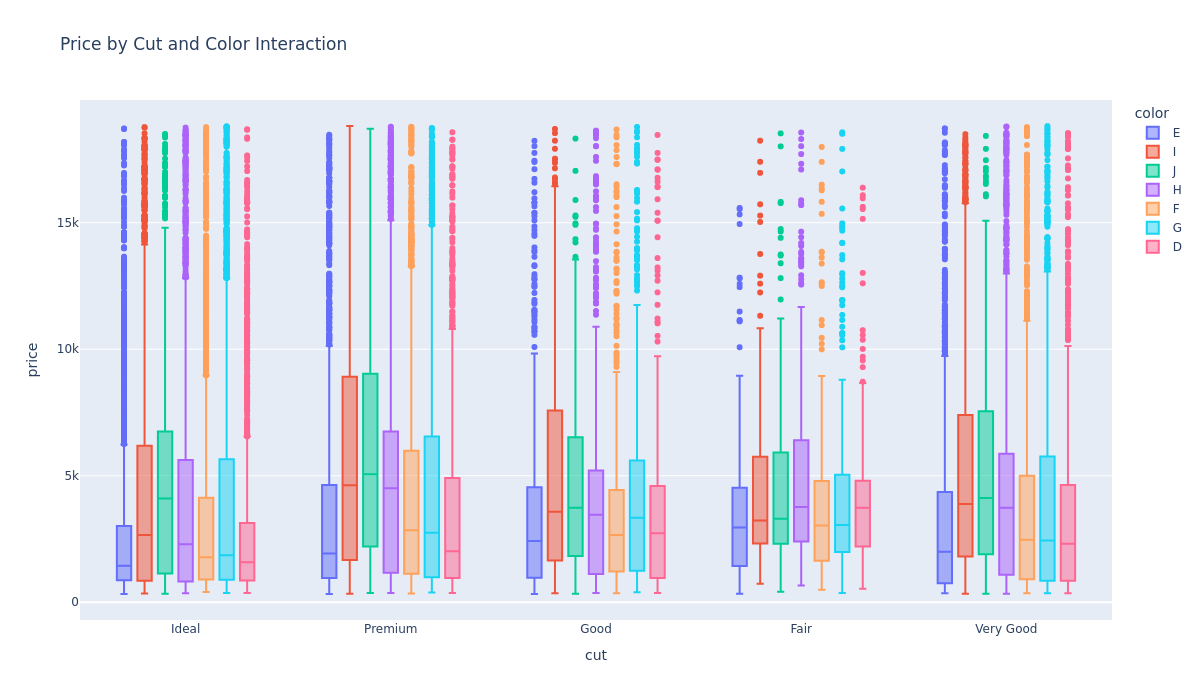

In [92]:
fig = px.box(
    data,
    x='cut',
    y='price',
    width=1200,
    height=700,
    title='Price by Cut and Color Interaction',
    color='color'
)
fig.show()

Again we get a paradox. Diamonds with an ideal cut and ideal color are cheaper than others. Perhaps this is due to the weight of the diamond?

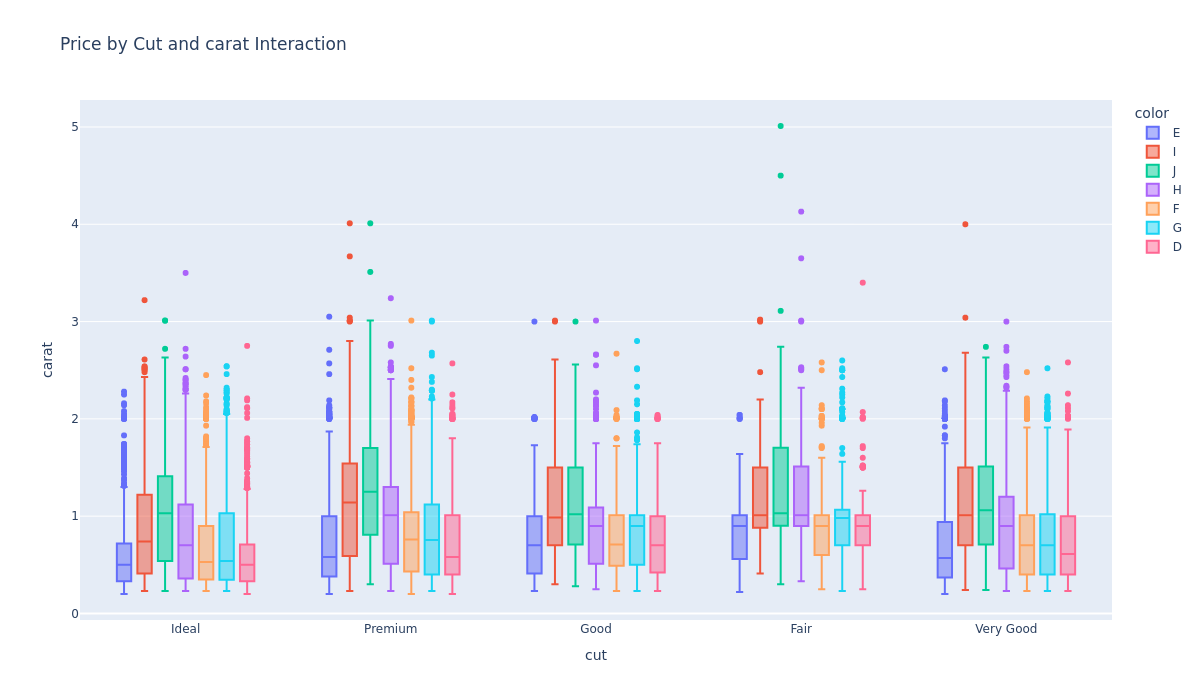

In [93]:
fig = px.box(
    data,
    x='cut',
    y='carat',
    width=1200,
    height=700,
    title='Price by Cut and carat Interaction',
    color='color'
)
fig.show()

What is the price difference between diamonds of the same cut, but different clarity?

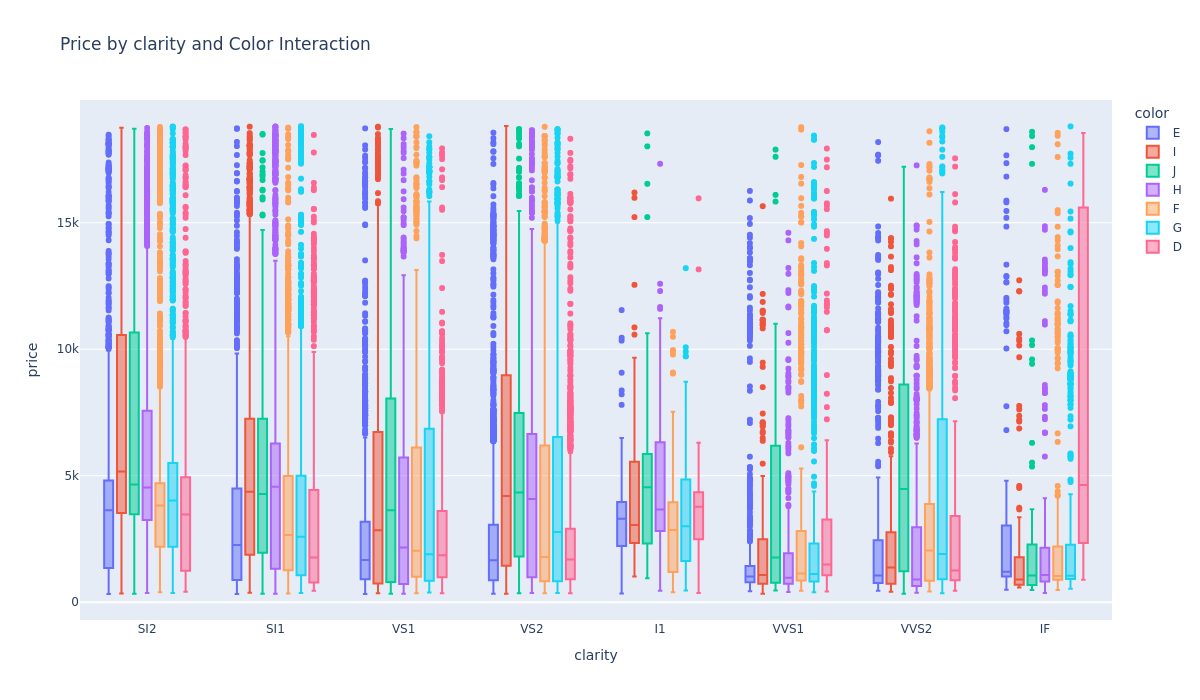

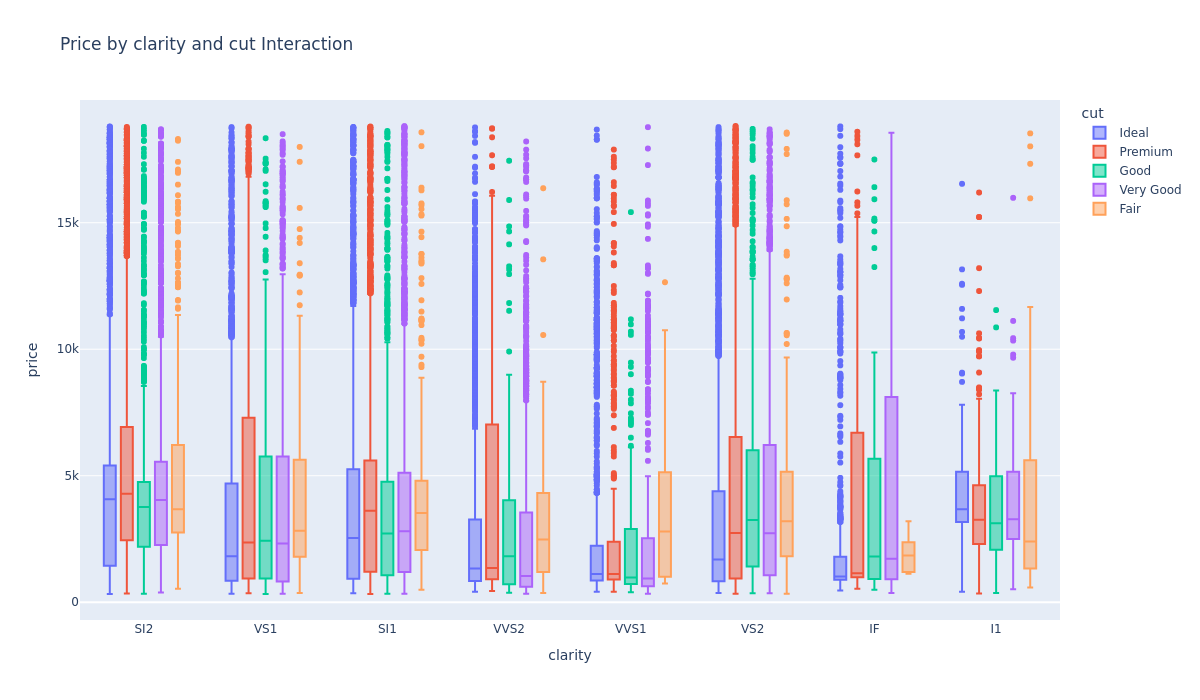

In [94]:
fig = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity and Color Interaction',
    color='color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price',
    width=1200,
    height=700,
    title='Price by clarity and cut Interaction',
    color='cut'
)
fig.show()
fig_1.show()

How does price per carat vary across cut, color, and clarity categories?

In [95]:
data['price_per_carat'] = data['price'] / data['carat']
data

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       price_per_carat  
0          1417.391304  
1          1552.380952  
2          1421.739130  
3          1151.724138  
4          1080.645161  
...                ...  
53935      3829.166667  
53936      3829.166667  
53937      3938.571429  
53938      3205.813953  
53939      3676.000000  

[53794 rows x 11 columns]

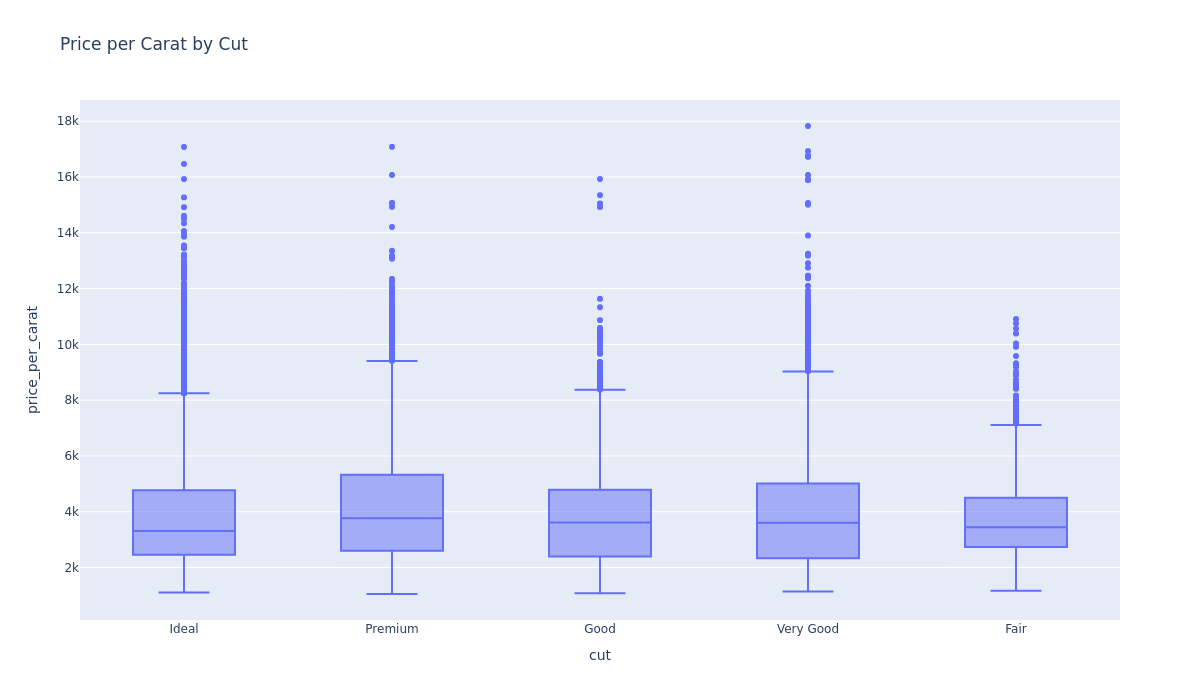

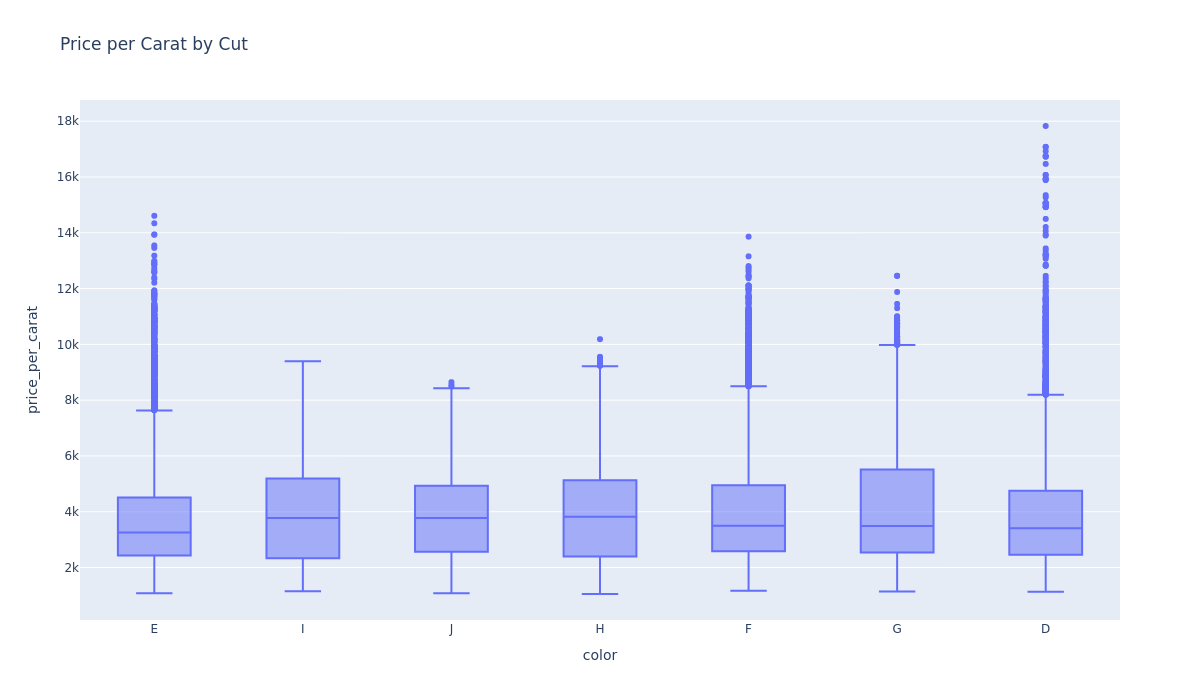

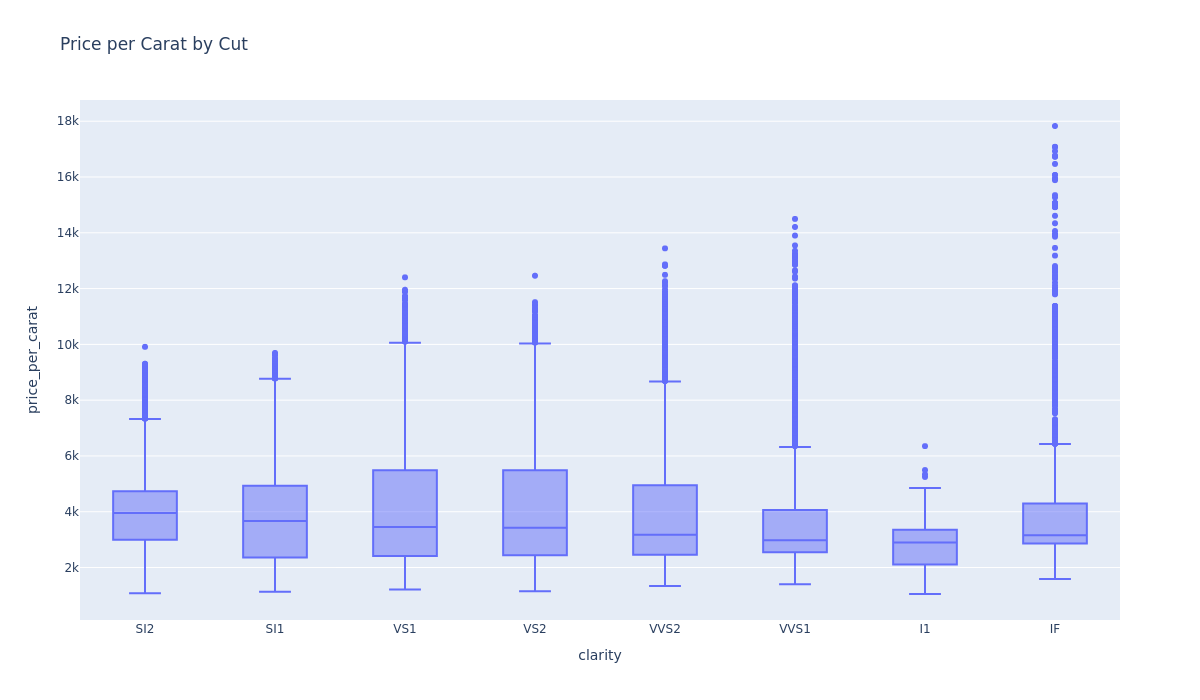

In [96]:
fig = px.box(
    data,
    x='cut',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig_1 = px.box(
    data,
    x='color',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig_2 = px.box(
    data,
    x='clarity',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut'
)
fig.show()
fig_1.show()
fig_2.show()

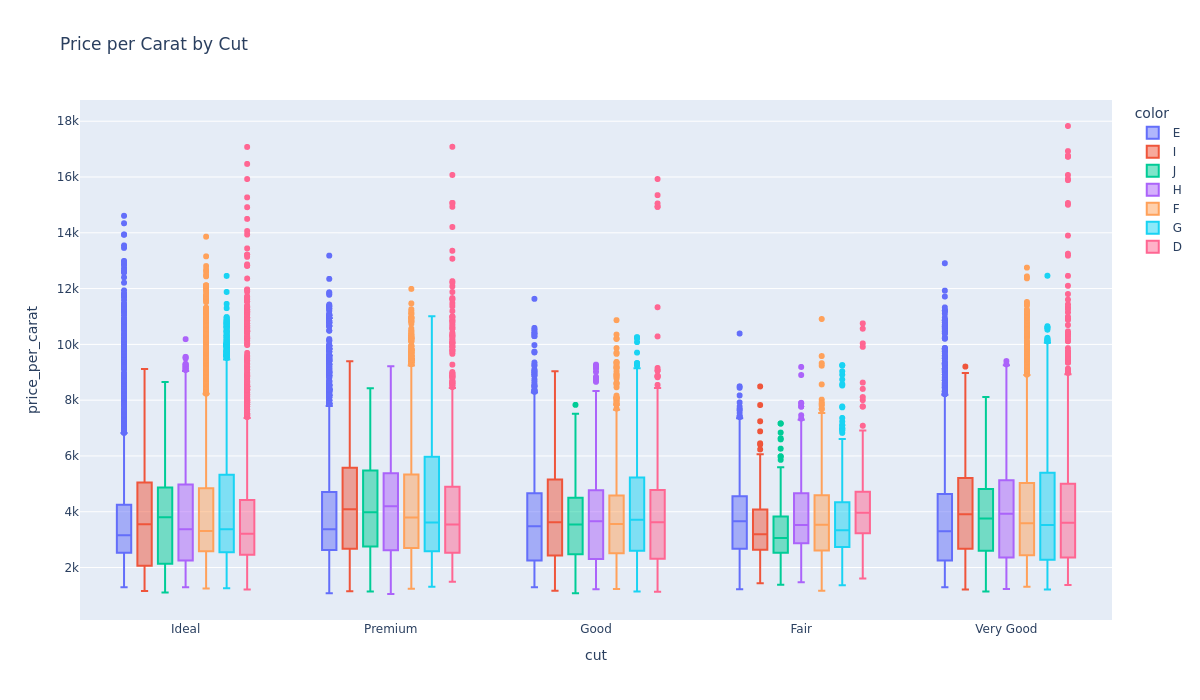

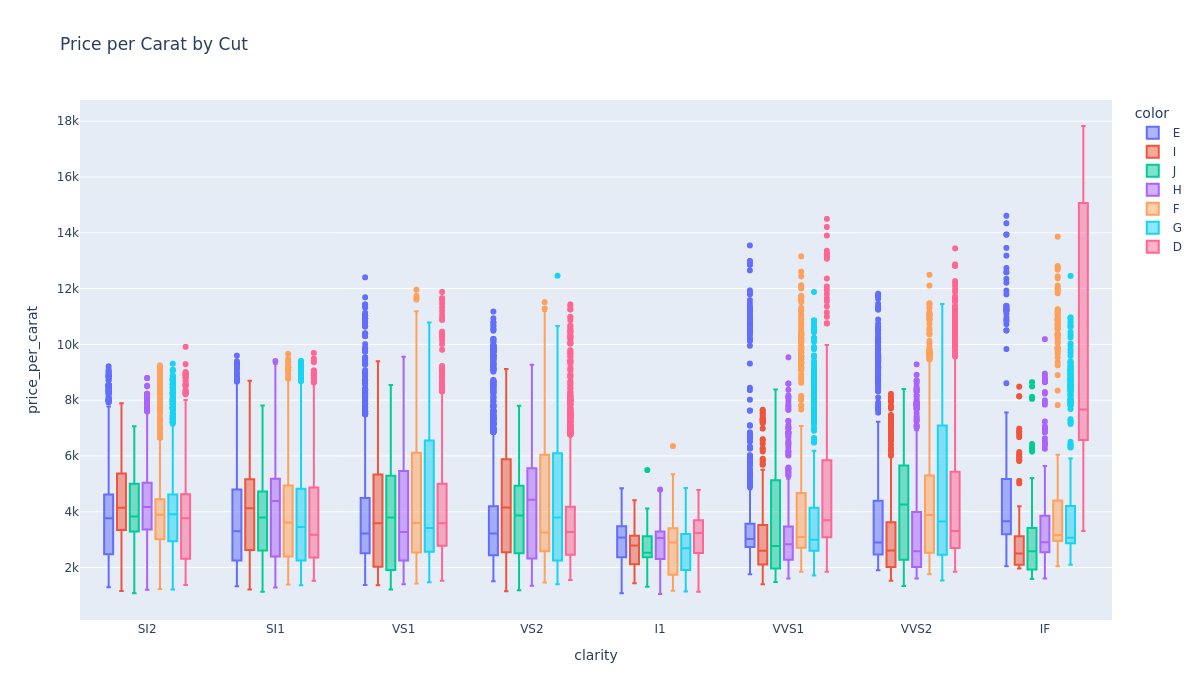

In [97]:
fig = px.box(
    data,
    x='cut',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut',
    color='color'
)
fig_1 = px.box(
    data,
    x='clarity',
    y='price_per_carat',
    width=1200,
    height=700,
    title='Price per Carat by Cut',
    color='color'
)
fig.show()
fig_1.show()

Price distributions vary widely in cut categories, especially in Premium and Ideal, which indicate a diverse selection. The wider price distribution in lower color grades (J, I, H) suggests that larger, affordable options are available despite color quality.

### How do multiple features interact to influence diamond prices?

In [98]:
data

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       price_per_carat  
0          1417.391304  
1          1552.380952  
2          1421.739130  
3          1151.724138  
4          1080.645161  
...                ...  
53935      3829.166667  
53936      3829.166667  
53937      3938.571429  
53938      3205.813953  
53939      3676.000000  

[53794 rows x 11 columns]

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/home/estaid/miniconda3/envs/my_project/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` be

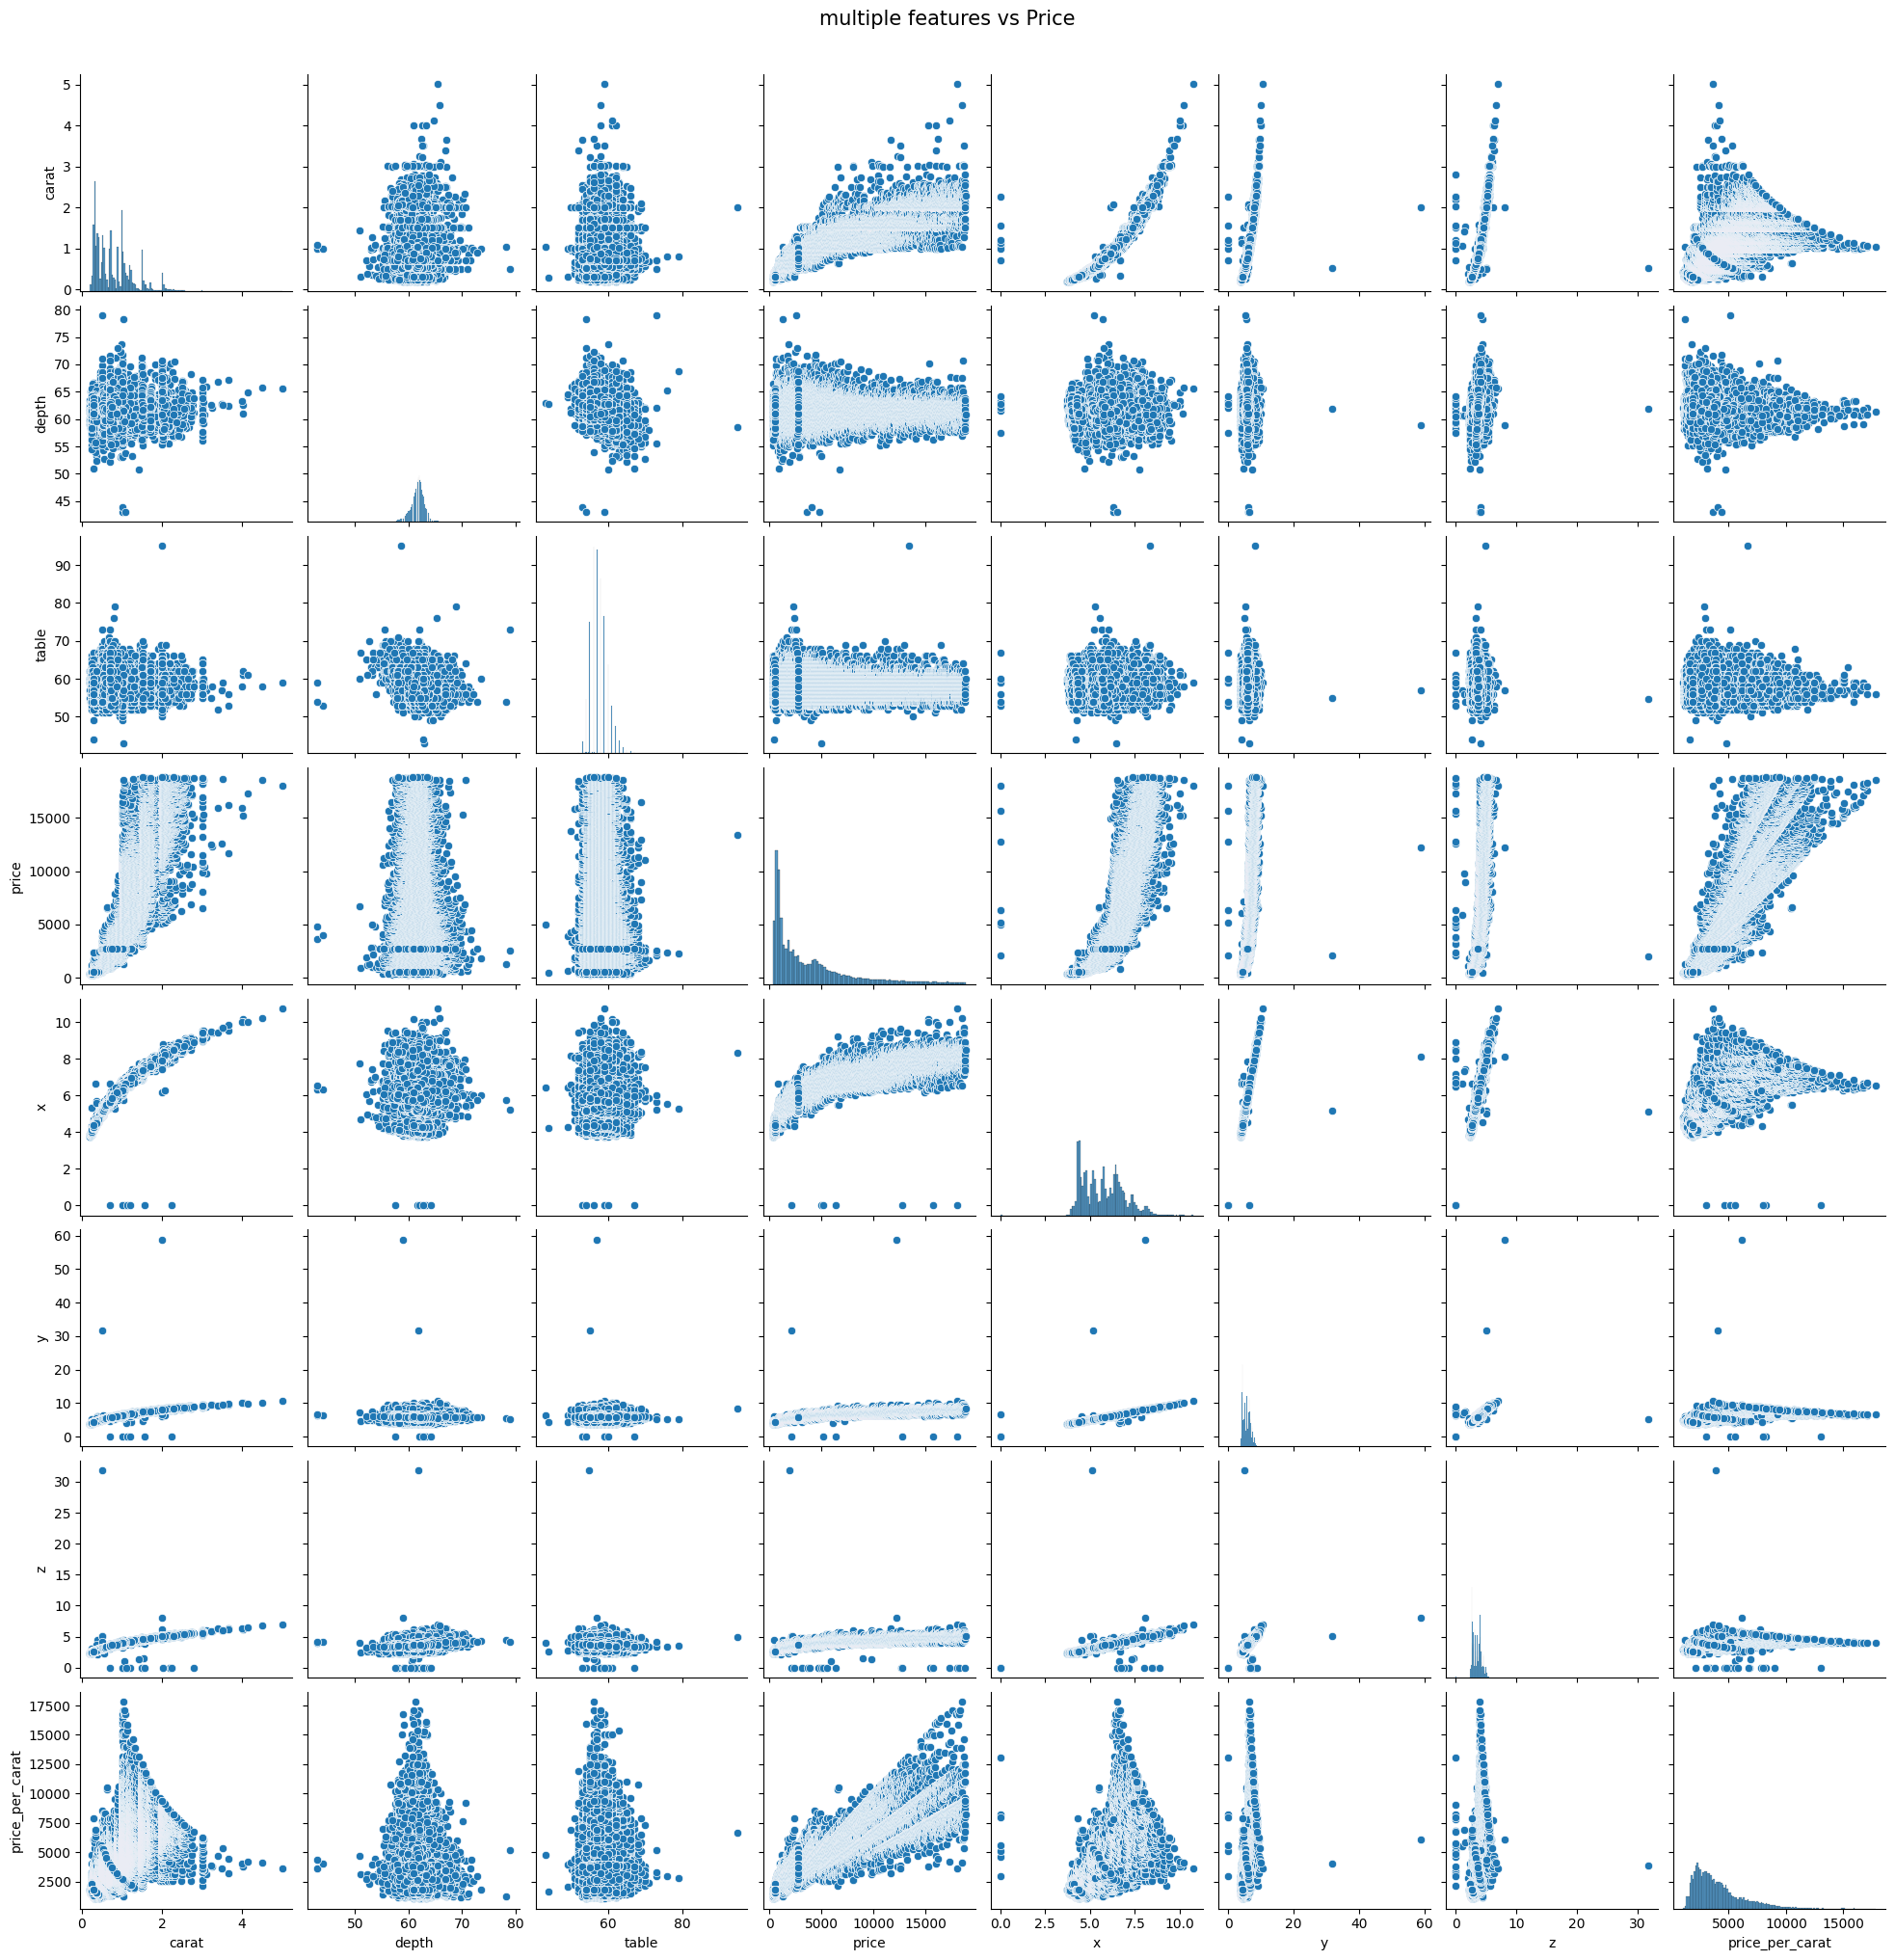

In [99]:
sns.pairplot(data, kind='scatter', palette='YlGnBu')
plt.suptitle('multiple features vs Price', y=1.02, fontsize=15)
plt.show()

Insights:
* **x, y, z (Length, Width, Depth): The scatter plots between these dimensional variables show a linear relationship between x (length), y (width), and z (depth). This suggests that as the length or width of the diamond increases, the depth tends to increase as well, implying consistency in the diamond's proportions**. However, there are some diamonds with higher lengths (x) that don’t necessarily have corresponding large depths (z), which might indicate flatter or more elongated diamond shapes.

* **cut, color, clarity: The categorical attributes (e.g., cut, color, clarity) are likely represented in the diagonal with separate distributions. We can observe how these categorical variables are distributed and how they overlap with other features.** For example, diamonds with higher clarity grades (IF, VVS1) may show a slight tendency toward higher length or width values. ** Similarly, diamonds with better cut or color grades might cluster within a specific range of dimensions (length, width, depth), showing that higher-quality diamonds may follow certain physical trends.

### Do diamonds with higher clarity also tend to have higher carat weights?

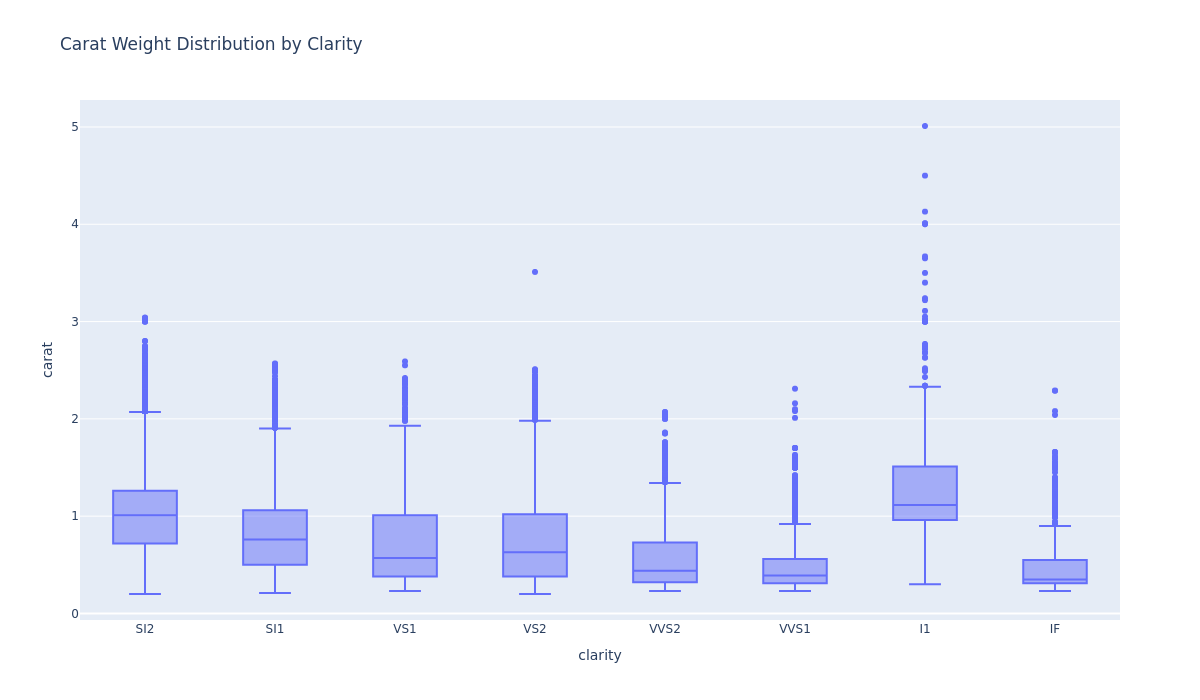

In [100]:
fig = px.box(
    data,
    x='clarity',
    y='carat',
    width=1200,
    height=700,
    title='Carat Weight Distribution by Clarity'
)
fig.show()

I1 clarity diamonds have the widest range of carat weights, including many larger diamonds. In contrast, IF clarity diamonds tend to have smaller carat weights. Overall, higher clarity does not correlate with higher carat weight, as lower clarity diamonds like I1 can still have larger carat weights

### How does price per carat vary across different clarity and color combinations?

In [101]:
price_per_carat_pivot = data.pivot_table(values='price_per_carat', index='clarity', columns='color', aggfunc='mean')

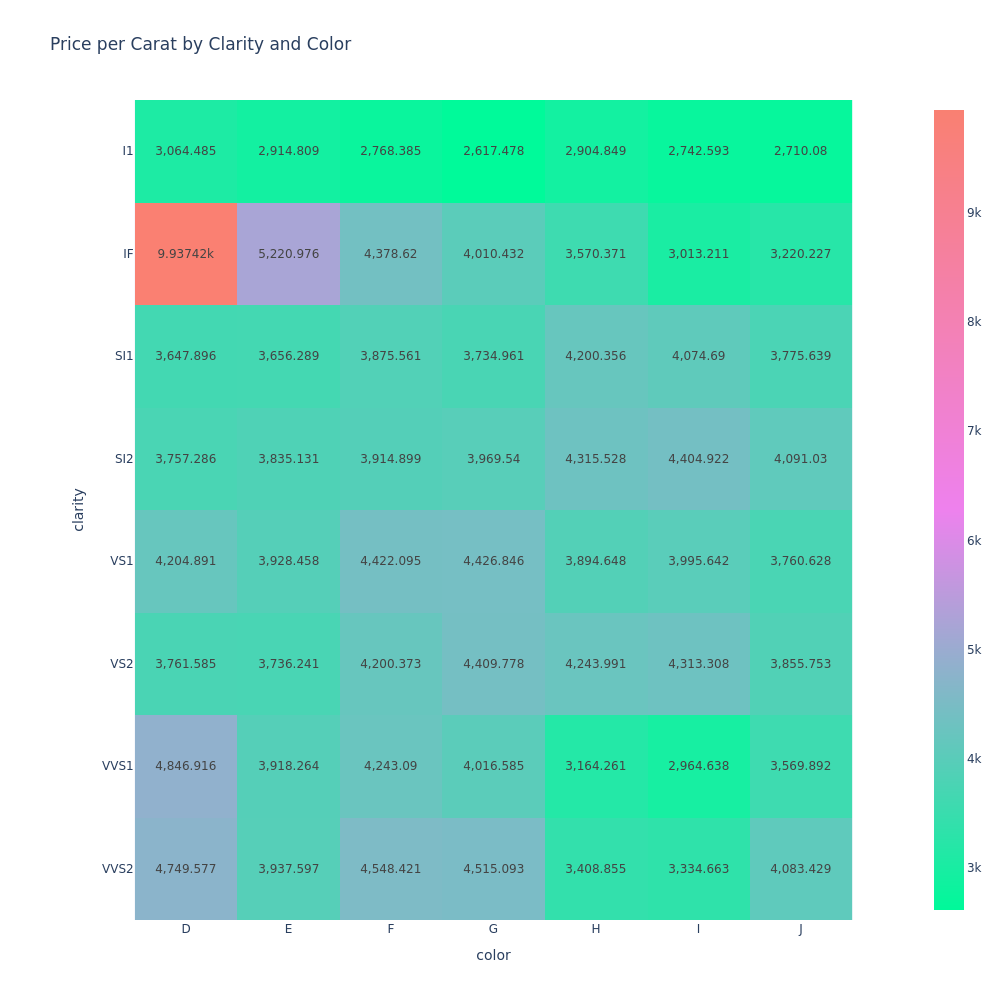

In [102]:
custom_colorscale = [
    [0, '#00FA9A'],       
    [0.5, '#EE82EE'],      
    [1, '#FA8072']            
]

fig = px.imshow(
    price_per_carat_pivot,
    text_auto=True,
    width=1000,
    height=1000,
    title='Price per Carat by Clarity and Color',
    color_continuous_scale=custom_colorscale
)
fig.show()

The heatmap shows that diamond prices per carat increase with better clarity and color. Diamonds with IF clarity and D color are the most expensive, with the highest price at 9937. As clarity decreases (e.g., I1) and color becomes less pure (moving from D to J), prices drop significantly. High clarity (IF, VVS) and colorless diamonds (D, E, F) tend to be the most valuable, while lower clarity (I1) and more colored diamonds (G-J) are generally less expensive.

### Are there optimal ranges of depth and table percentages that result in higher prices?

<Figure size 1000x600 with 0 Axes>

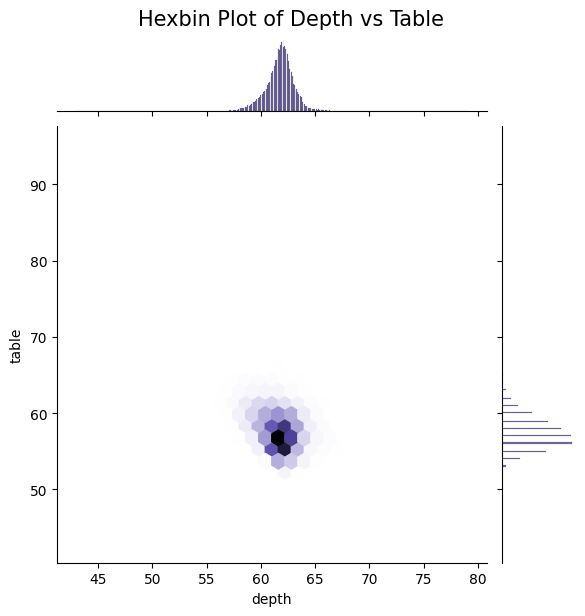

In [103]:
plt.figure(figsize=(10,6))
sns.jointplot(x='depth', y='table', data=data, kind='hex', color='darkslateblue', gridsize=30)
plt.suptitle('Hexbin Plot of Depth vs Table', y=1.02, fontsize=15)
plt.show()

* `Optimal Range:` Most diamonds cluster around a depth of 60-65% and a table percentage of 55-60%.

* `Higher Density:` The densest region, where the highest number of diamonds are found, indicates that this range of depth and table percentages is common and likely optimal for balancing price, cut quality, and appearance.

#### General Business Insights

* `Market Segmentation:` The majority of customers appear to be in the lower price range, indicating a substantial market for affordable diamonds. Businesses should consider targeting this segment with promotional offerings.

* `Emphasis on Value:` Mid-range color and clarity diamonds (e.g., G-H colors and SI1-VS2 clarity) can be marketed as offering the best value for customers who want a balance between beauty and affordability.

* `Highlighting Size:` Carat size significantly influences price; therefore, larger diamonds should be marketed as luxury items, while smaller diamonds should be promoted as elegant yet affordable options.

* `Diverse Inventory:` Stocking a variety of cuts, colors, and clarity levels is essential to cater to different customer preferences. Maintaining a strong inventory of Ideal and Premium cuts will attract higher-end buyers.

* `Education in Marketing:` Since factors like cut, color, and clarity influence price and perception, educating customers about the attributes of diamonds is vital. Marketing should convey how these characteristics affect beauty and value.

* `Affordable Luxury:` Highlighting larger, lower-color-grade diamonds as affordable luxury can attract budget-conscious consumers while still offering substantial visual appeal.

* `Luxury Targeting:` For high-end clients, emphasize the rarity and purity of high-grade diamonds (D, E, F colors, IF, VVS clarity), as these will appeal to those seeking exclusivity.

## Data Preprocessing

In [104]:
data = data.drop('price_per_carat', axis=1)
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [105]:
num_cols = data.select_dtypes(include = ['int64','float64'])
num_cols.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

### Spliting

In [106]:
X = data.drop('price', axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (43035, 9) (43035,)
Testing data shape: (10759, 9) (10759,)


### Handling Outliers

In [107]:
features_with_outliers = []
for feature in num_cols:
    percentile25 = data[feature].quantile(0.25)
    percentile75 = data[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = data[(data[feature] > upper_limit) | (data[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(data) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Proportion of outliers: {proportion_of_outliers:.2f}%\n")

Feature: carat
Number of outliers: 1873
Proportion of outliers: 3.48%

Feature: depth
Number of outliers: 2525
Proportion of outliers: 4.69%

Feature: table
Number of outliers: 604
Proportion of outliers: 1.12%

Feature: price
Number of outliers: 3523
Proportion of outliers: 6.55%

Feature: x
Number of outliers: 31
Proportion of outliers: 0.06%

Feature: y
Number of outliers: 28
Proportion of outliers: 0.05%

Feature: z
Number of outliers: 48
Proportion of outliers: 0.09%



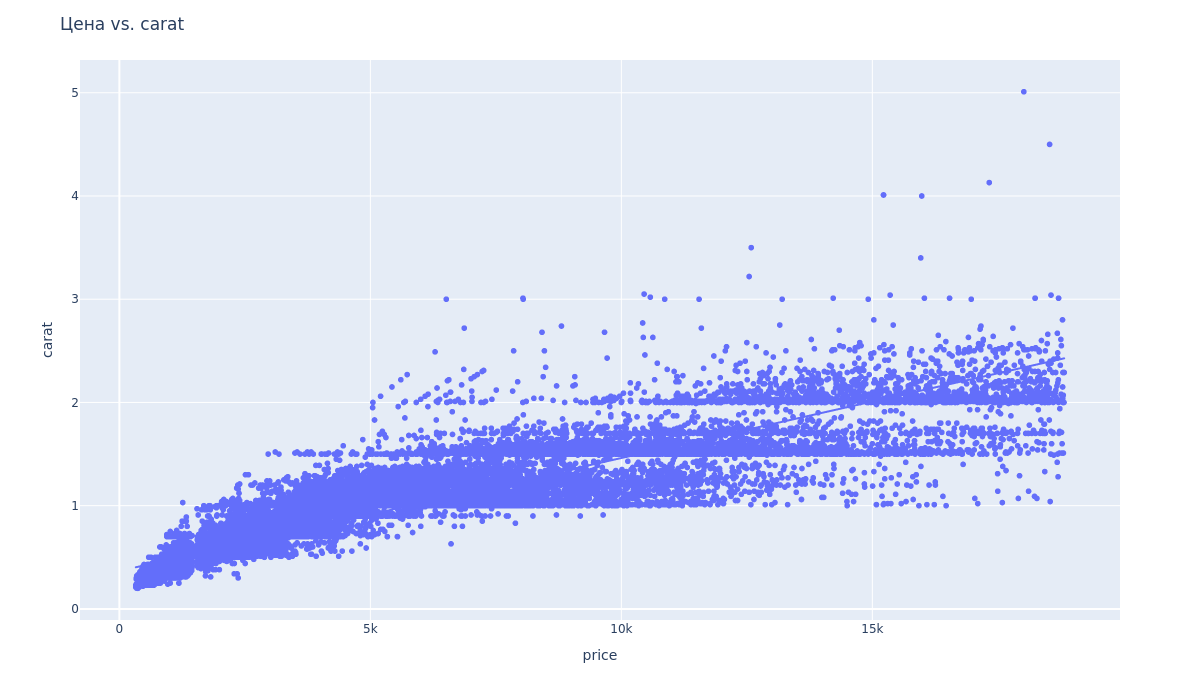

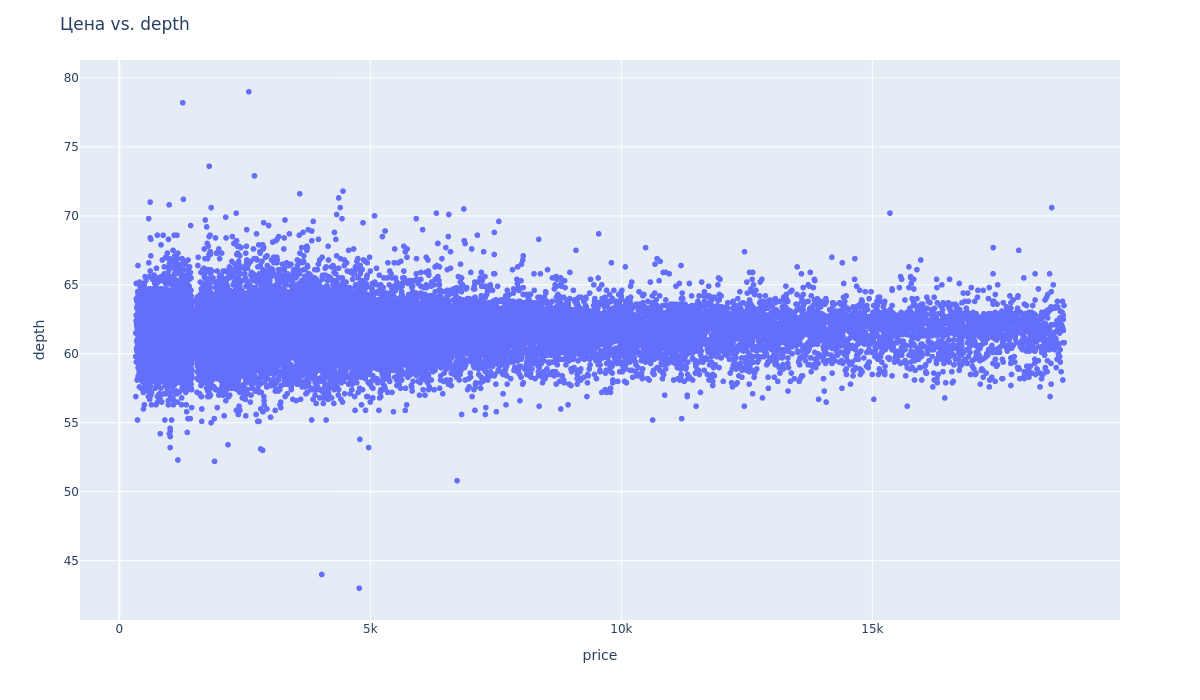

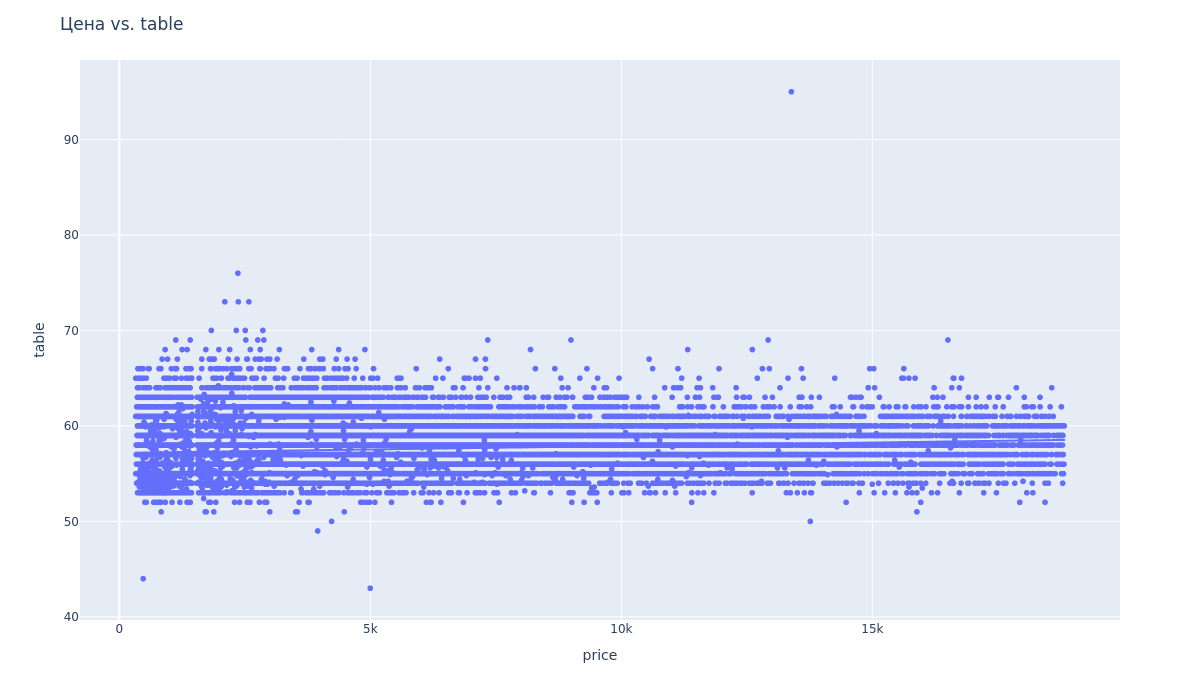

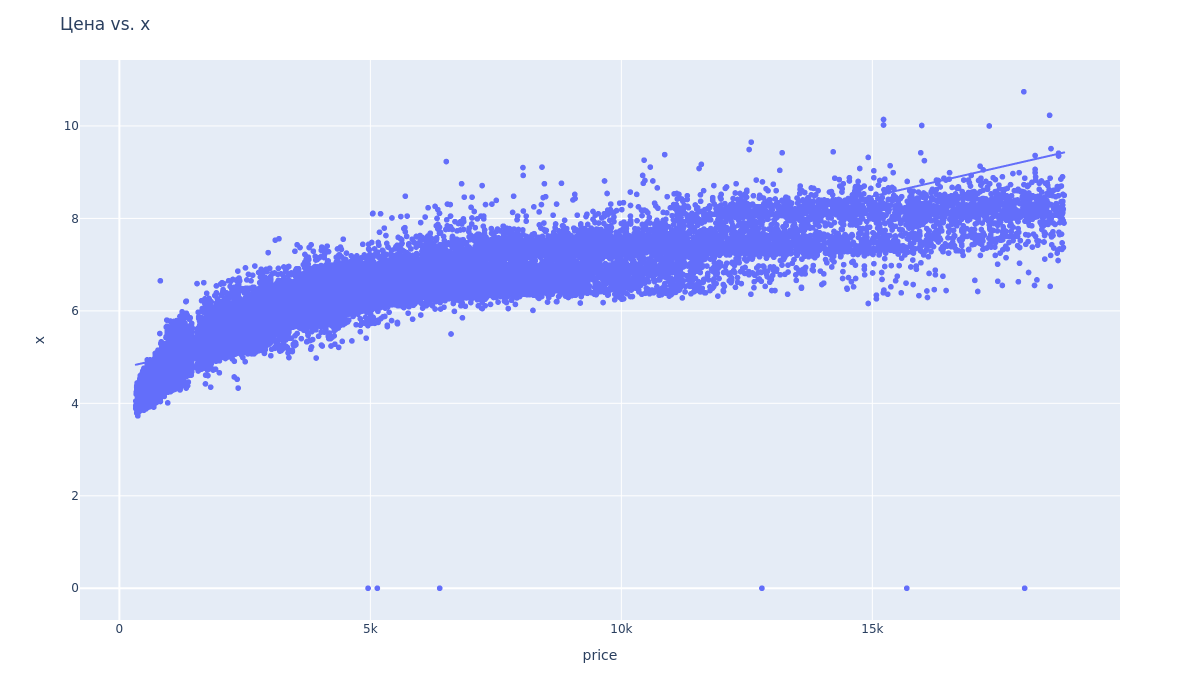

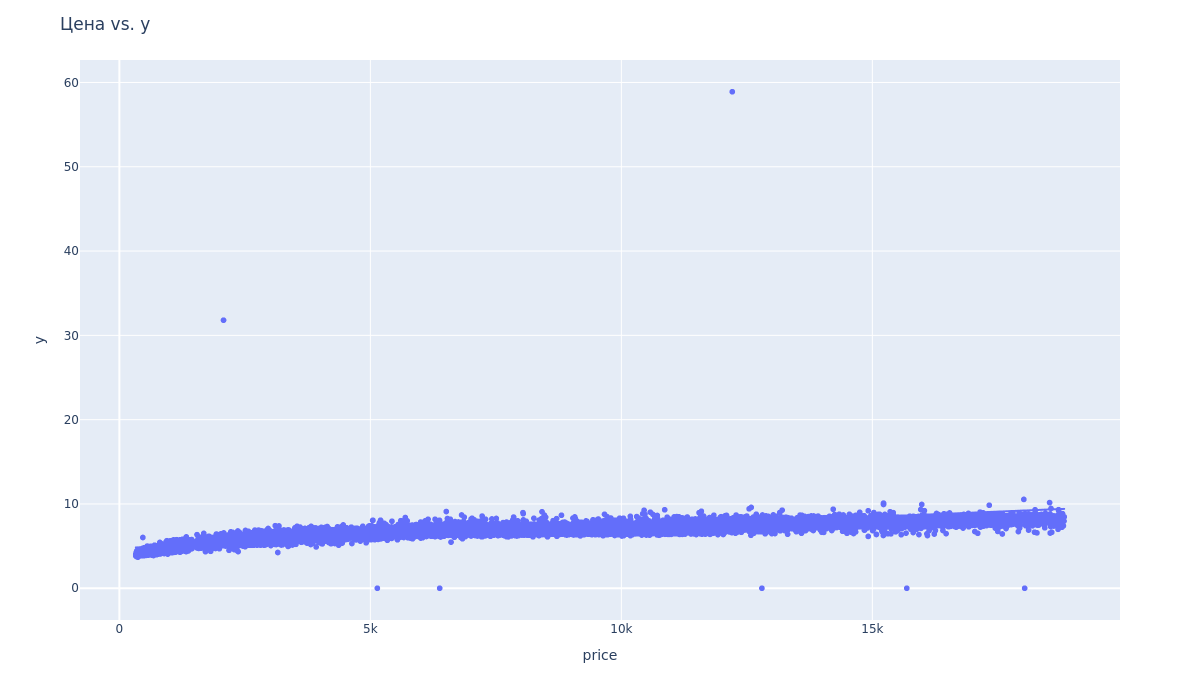

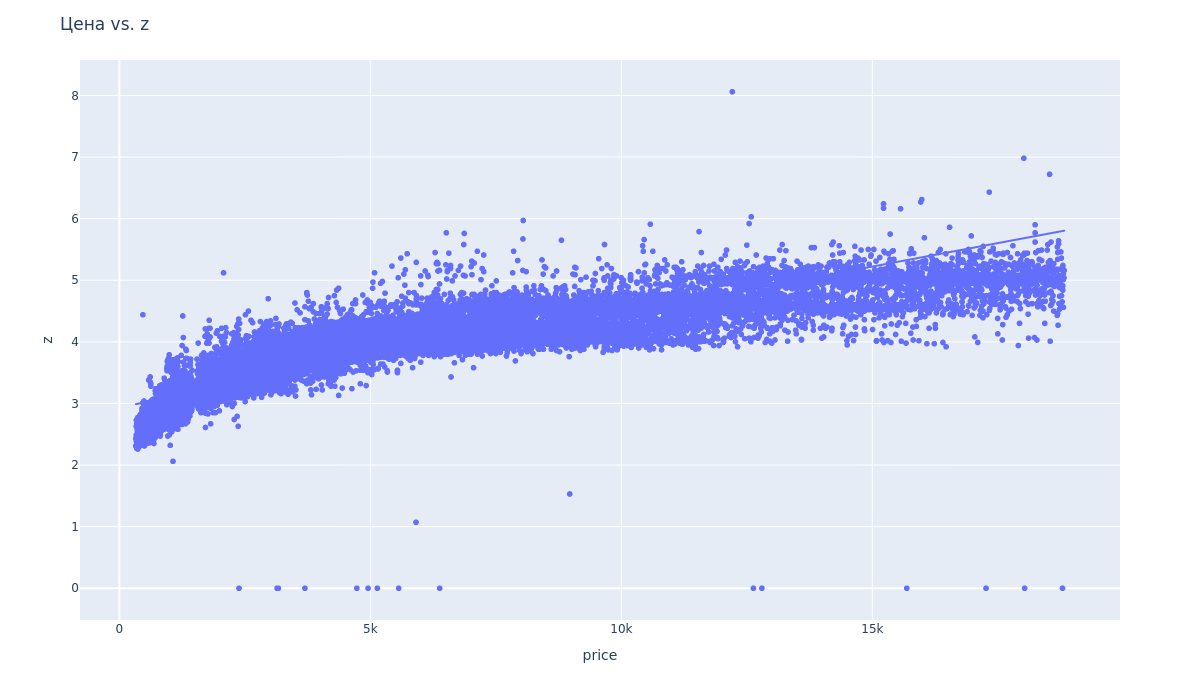

In [108]:
train_data = pd.concat([x_train, y_train], axis=1)

for col in num_cols.columns:
    if col == 'price':
        continue
    
    fig = px.scatter(
        train_data, 
        x="price", 
        y=col, 
        trendline="ols",
        width=1200,
        height=700
    )
    fig.update_layout(title=f'Цена vs. {col}')
    fig.show()

In [109]:
train_data = train_data[(train_data["depth"] < 75) & (train_data["depth"] > 45)]
train_data = train_data[(train_data["table"] < 89) & (train_data["table"] > 40)]
train_data = train_data[(train_data["x"]<15)]
train_data = train_data[(train_data["y"]<15)]
train_data = train_data[(x_train["z"]<15)]

/tmp/ipykernel_677/3214386907.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



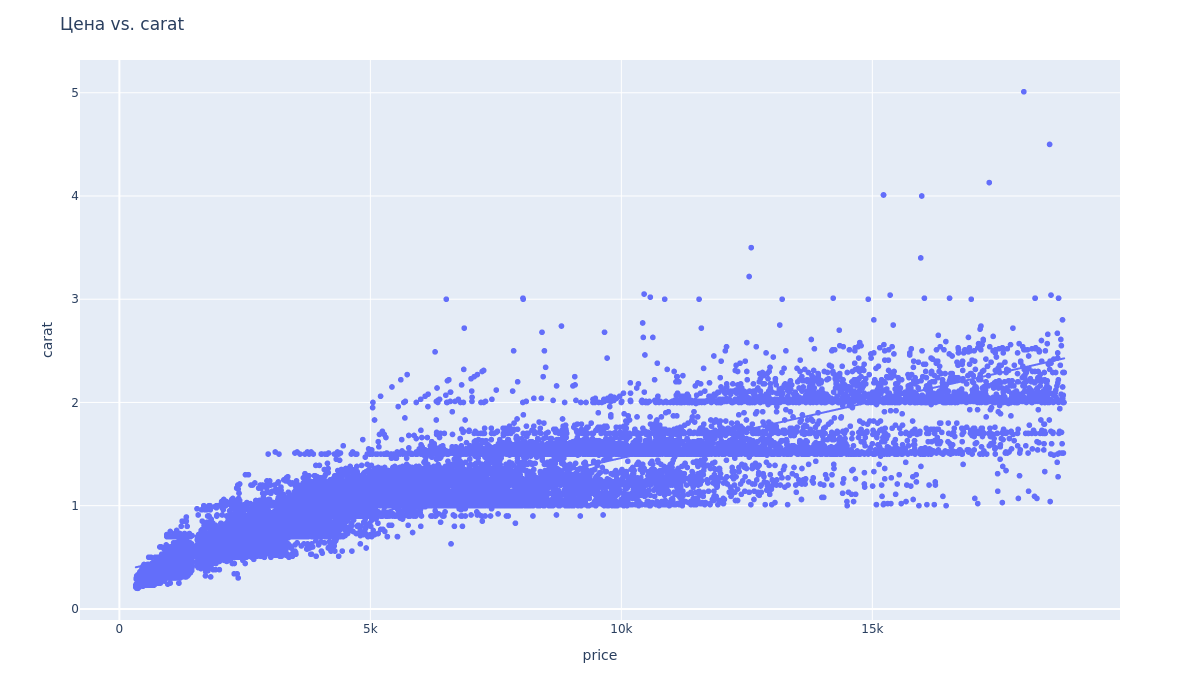

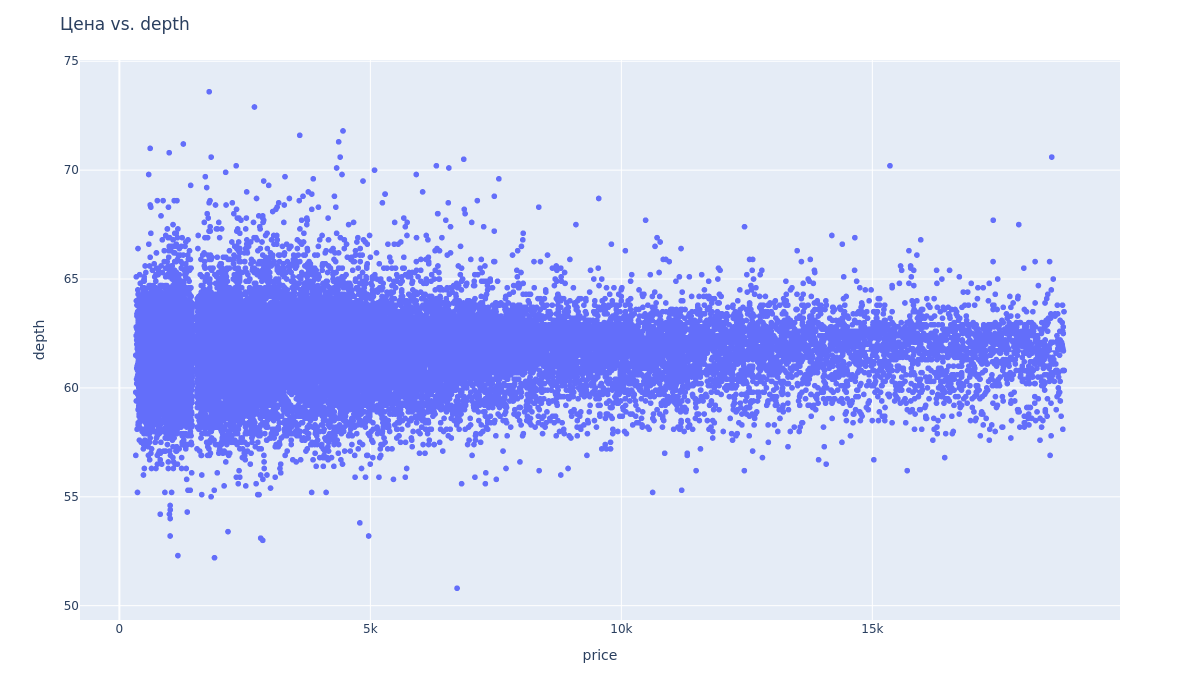

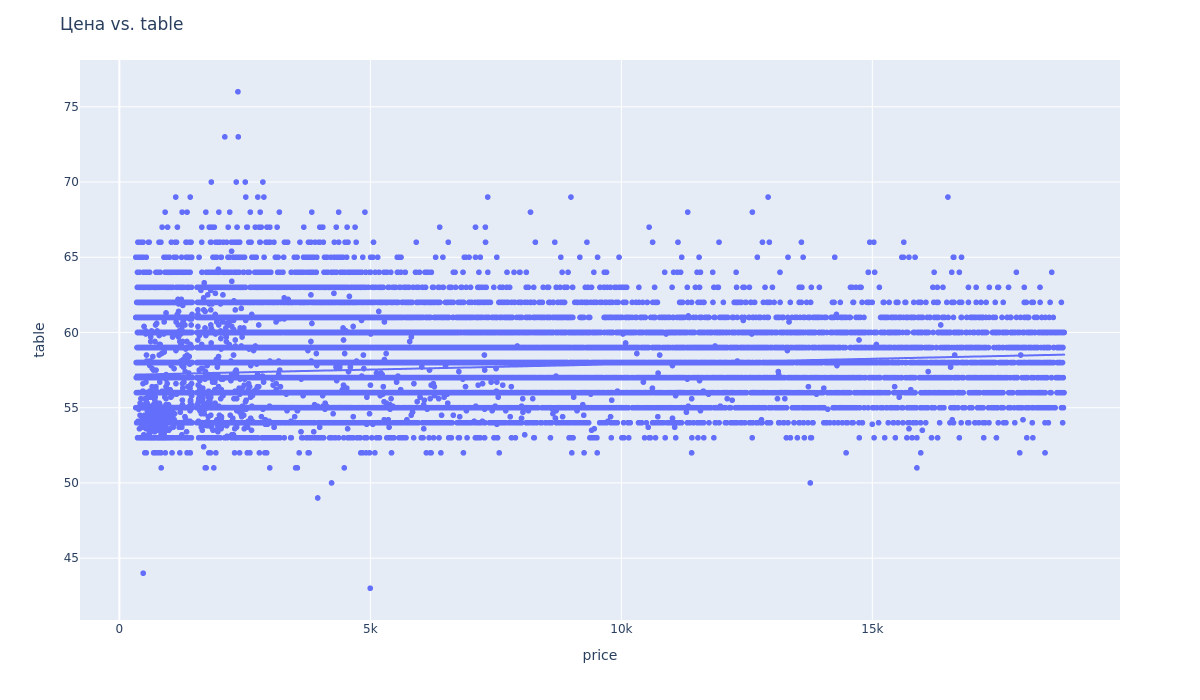

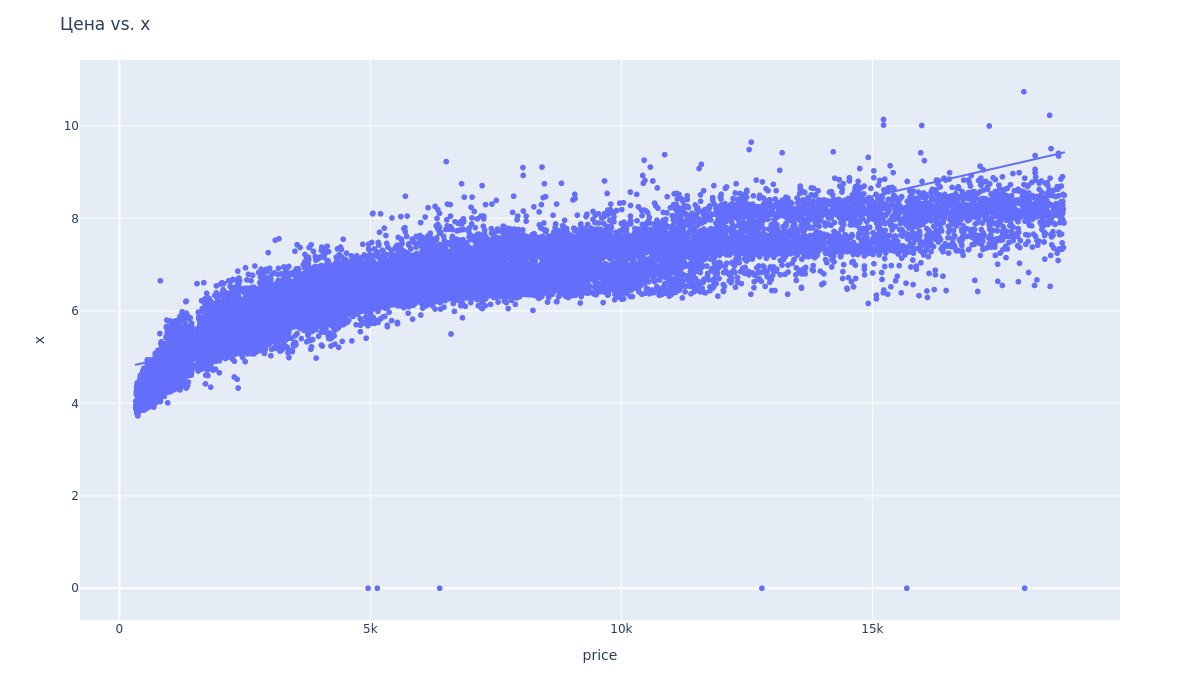

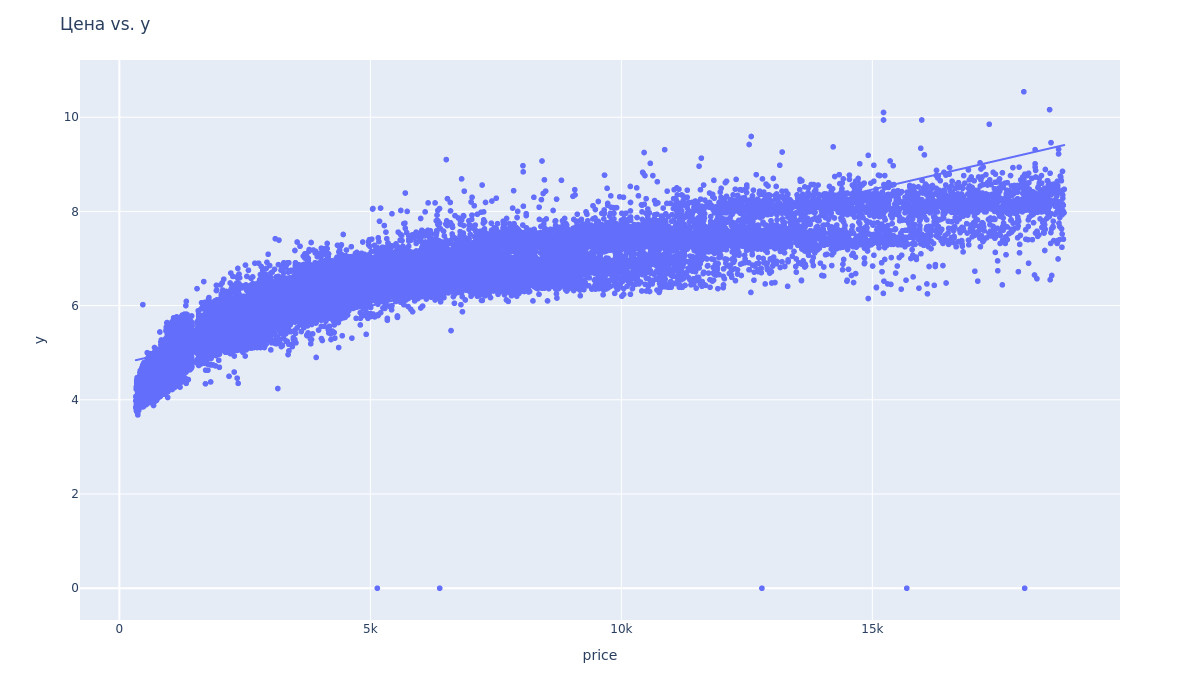

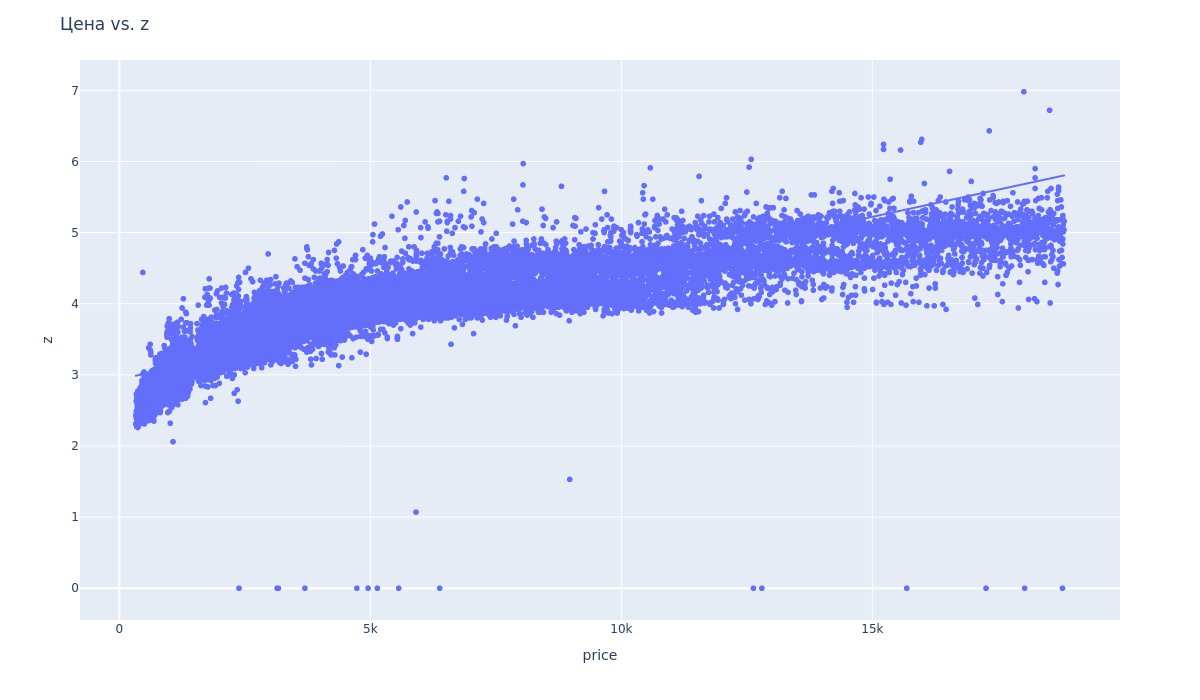

In [110]:
for col in num_cols.columns:
    if col == 'price':
        continue
    
    fig = px.scatter(
        train_data, 
        x="price", 
        y=col, 
        trendline="ols",
        width=1200,
        height=700
    )
    fig.update_layout(title=f'Цена vs. {col}')
    fig.show()

In [111]:
x_train=train_data.drop('price',axis=1)
y_train=train_data['price']

In [112]:
x_train_copy = x_train.copy()

In [113]:
x_train_copy.describe().T

count       mean       std   min    25%    50%    75%    max
carat  43028.0   0.799013  0.475951   0.2   0.40   0.70   1.04   5.01
depth  43028.0  61.749024  1.416428  50.8  61.00  61.80  62.50  73.60
table  43028.0  57.458048  2.224127  43.0  56.00  57.00  59.00  76.00
x      43028.0   5.732713  1.125131   0.0   4.71   5.69   6.54  10.74
y      43028.0   5.734591  1.116572   0.0   4.72   5.71   6.54  10.54
z      43028.0   3.539041  0.696653   0.0   2.91   3.52   4.04   6.98

### Missing Values (x, y, z)

In [114]:
x_train_copy['x']=x_train_copy['x'].replace(0, x_train_copy['x'].median())
x_train_copy['y']=x_train_copy['y'].replace(0, x_train_copy['y'].median())
x_train_copy['z']=x_train_copy['z'].replace(0, x_train_copy['z'].median())

In [115]:
x_train_copy.describe().T

count       mean       std    min    25%    50%    75%    max
carat  43028.0   0.799013  0.475951   0.20   0.40   0.70   1.04   5.01
depth  43028.0  61.749024  1.416428  50.80  61.00  61.80  62.50  73.60
table  43028.0  57.458048  2.224127  43.00  56.00  57.00  59.00  76.00
x      43028.0   5.733506  1.123093   3.73   4.71   5.69   6.54  10.74
y      43028.0   5.735255  1.114859   3.68   4.72   5.71   6.54  10.54
z      43028.0   3.540268  0.693512   1.07   2.91   3.52   4.04   6.98

### Check skewness

In [116]:
num_cols = x_train_copy.select_dtypes(include = ['int64','float64'])
num_cols.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [117]:
skewed_features = {}
skewed_columns = []


for feature in num_cols.columns:
    skewness = x_train_copy[feature].skew()
    skewed_features[feature] = skewness
    if skewness > 0.5:
        print(f"{feature} is right skewed with skewness: {skewness}")

for feature in num_cols:
    if skewed_features[feature] > 0.5:
        skewed_columns.append(feature)
        x_train_copy[feature] = np.log1p(x_train_copy[feature])


print("Log transformation applied to right-skewed features.")

carat is right skewed with skewness: 1.1148250968348838
table is right skewed with skewness: 0.669527474042019
Log transformation applied to right-skewed features.


In [118]:
cat_cols = x_train.select_dtypes(include = ['object'])
cat_cols.head()

cut color clarity
33544    Ideal     D     VS2
26752    Ideal     D     SI2
45914    Ideal     E     VS2
3071   Premium     D     SI1
43829    Ideal     E    VVS1

In [119]:
cat_cols.describe().T

count unique    top   freq
cut      43028      5  Ideal  17130
color    43028      7      G   9078
clarity  43028      8    SI1  10478

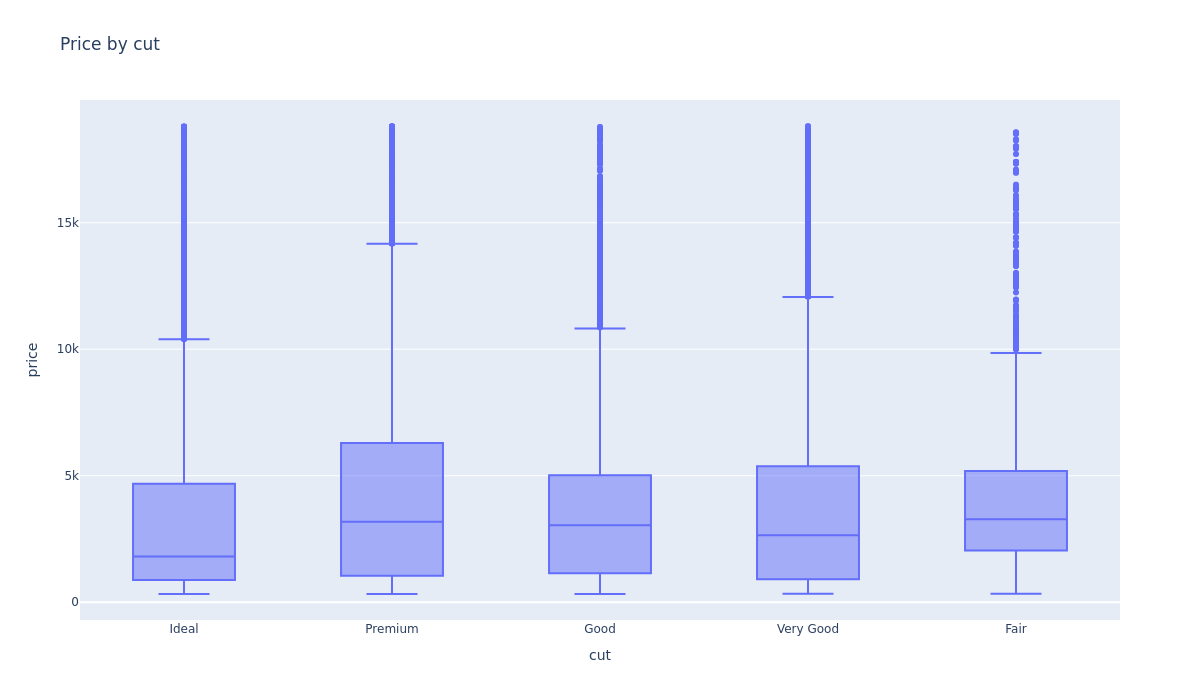

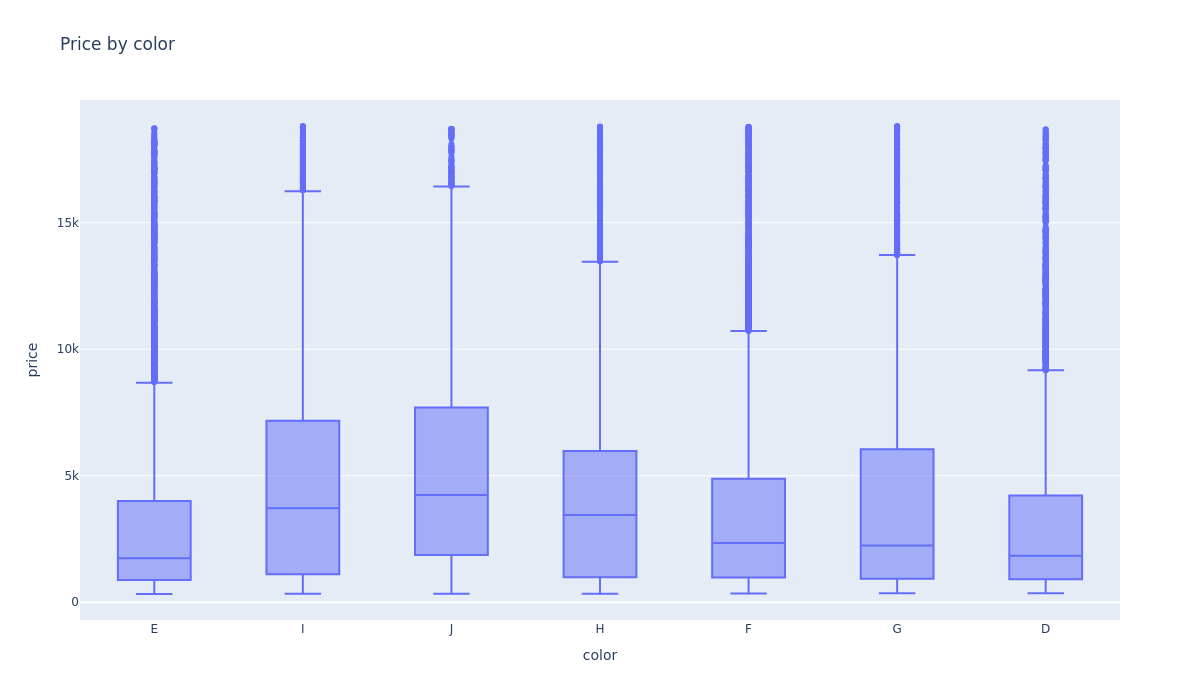

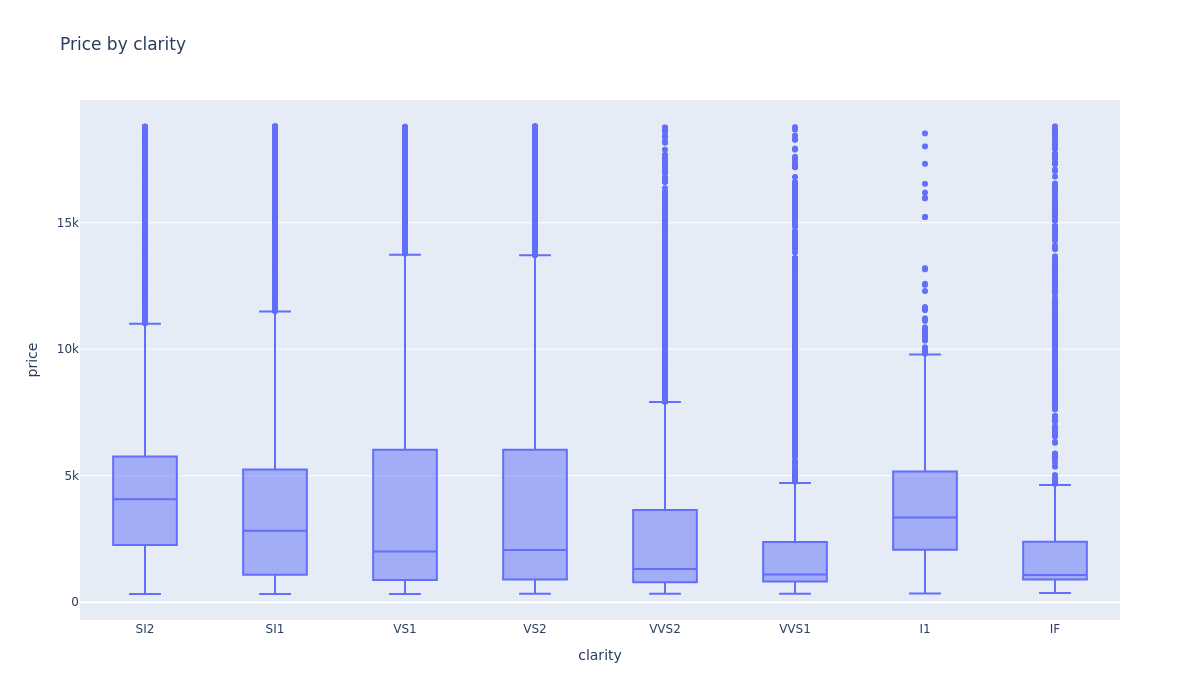

In [120]:
fig = px.box(
    data,
    x="cut",
    y="price",
    width=1200,
    height=700,
    title='Price by cut'
)
fig_1 = px.box(
    data,
    x="color",
    y="price",
    width=1200,
    height=700,
    title='Price by color'
)
fig_2 = px.box(
    data,
    x="clarity",
    y="price",
    width=1200,
    height=700,
    title='Price by clarity'
)
fig.show()
fig_1.show()
fig_2.show()

### Categorical Encoding

In [121]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories for each column in the correct order
ordinal_categories = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],  # for 'cut'
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],  # for 'color'
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # for 'clarity'
]


ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Apply the encoder to the columns
x_train_copy[['cut', 'color', 'clarity']] = ordinal_encoder.fit_transform(x_train_copy[['cut', 'color', 'clarity']])

### Correlation

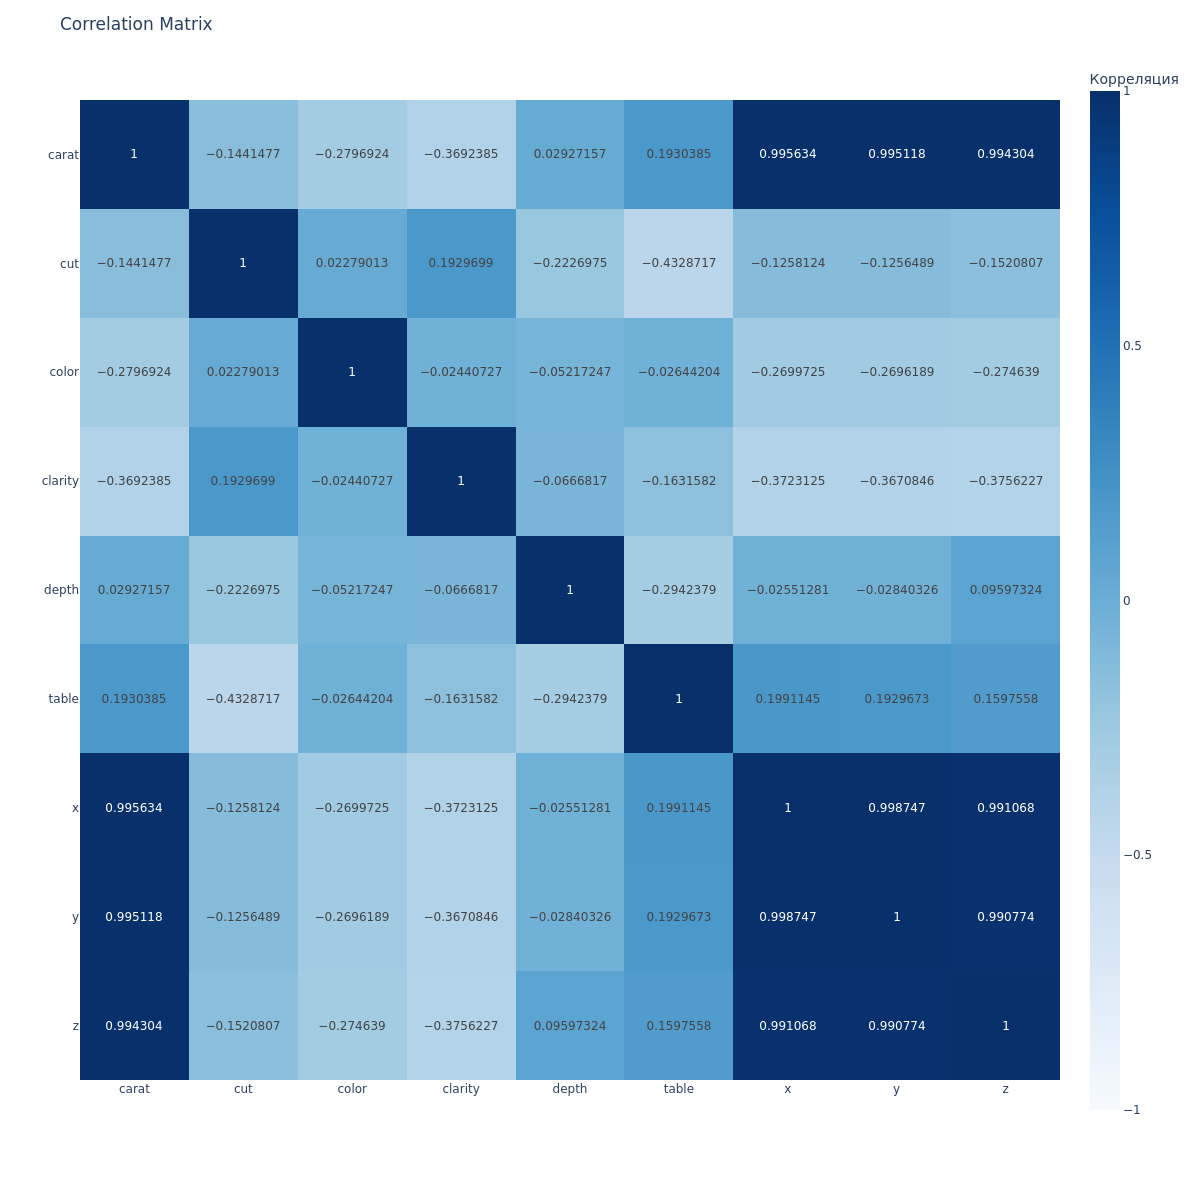

In [122]:
corr_matrix = x_train_copy.corr()
fig = px.imshow(
    corr_matrix, 
    text_auto=True, 
    zmin=-1, zmax=1, 
    color_continuous_scale='Blues',
    labels=dict(color="Корреляция")
)
fig.update_layout(width=1200, height=1200, title="Correlation Matrix")
fig.show()

Correlation measures the strength and direction of the linear relationship between two variables.

* Carat has a strong positive correlation with price (0.92), which means that as carat weight increases, so does the price of the diamond.
* Carat also has strong positive correlations with x, y, and z dimensions of the diamond, which is expected since a larger carat weight usually means a larger diamond.
* Depth has a weak negative correlation with price (-0.01), which means that there is almost no relationship between the depth of the diamond and its price.
* Table has a moderate positive correlation with price (0.13), which means that as the table percentage increases, the price of the diamond tends to increase as well.
* X, Y, and Z dimensions have strong positive correlations with each other, as expected since they are all measures of the size of the diamond.

In [123]:
x_train_copy['volume']=(x_train_copy.x*x_train_copy.y*x_train_copy.z)
x_train_copy.drop(['x','y','z'],axis=1,inplace=True)

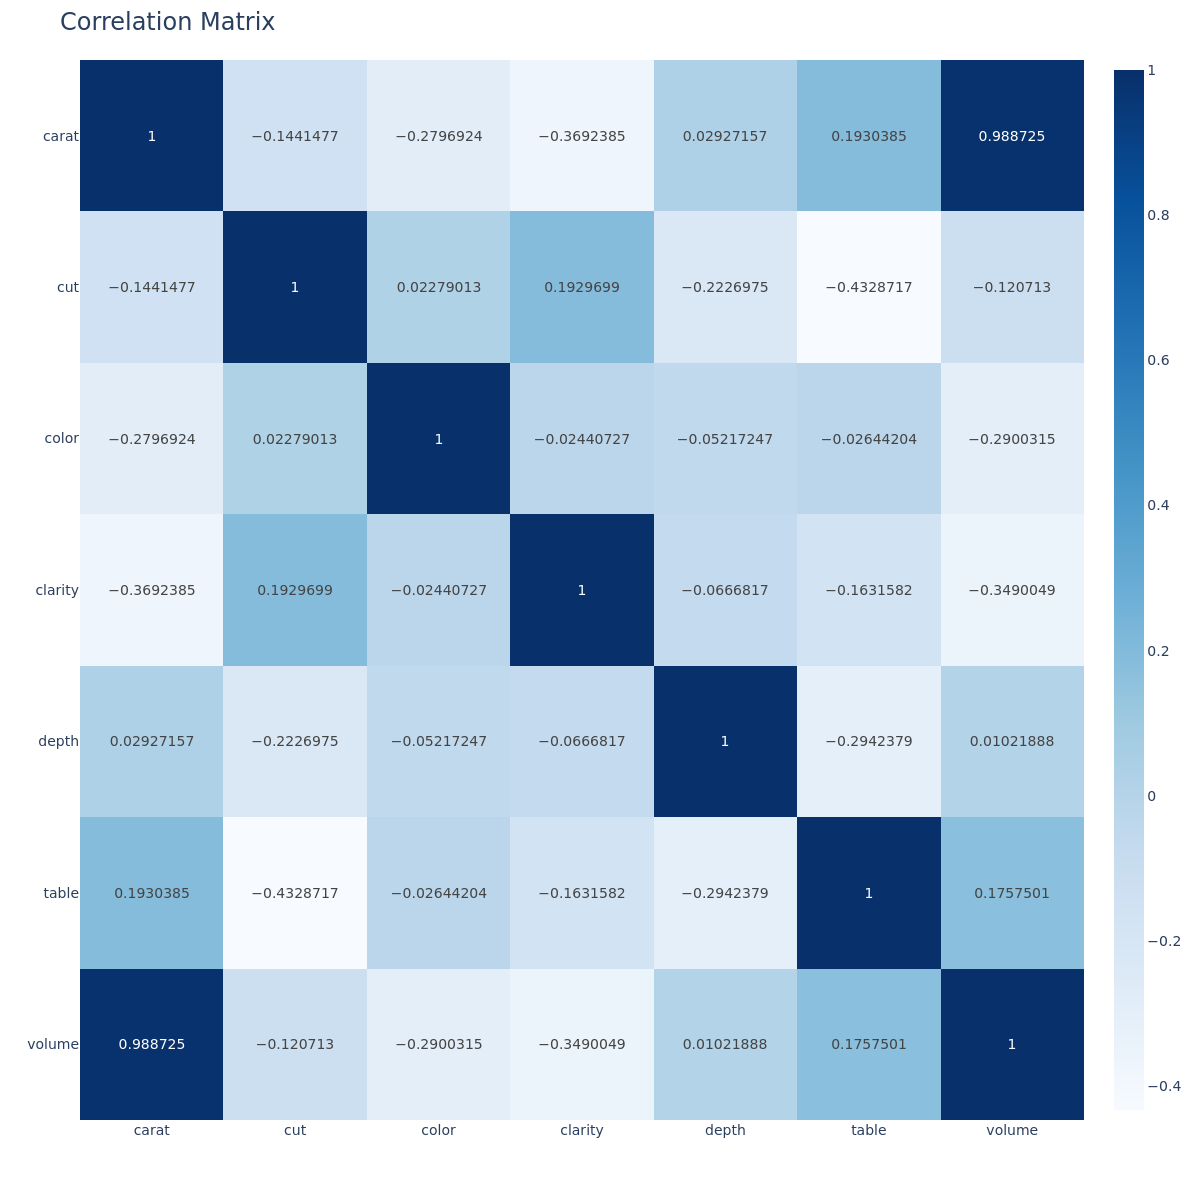

In [124]:
corr_matrix = x_train_copy.corr()
fig = px.imshow(
    corr_matrix, 
    text_auto=True, 
    aspect="auto", 
    color_continuous_scale='Blues'
)
fig.update_layout(title={'text': 'Correlation Matrix', 'font_size': 24}, font_size=14)
fig.update_layout(width=1200, height=1200)
fig.show()